In [1]:
####   
#Fz Einfluss auf Reifenmodelle
####

import numpy as np
import matplotlib.pyplot as plt

import sys
import os
sys.path.insert(0, os.path.abspath('../model'))

import Pacejka52 as pa52
import fiala as fi
import Brush as br
import TMeasy as tm
import Dugoff as du
import Pacejka52_glSA as pa52gl

sys.path.insert(0, os.path.abspath('../model/parameter'))
import Pacejka_Params_Indy as pa


i=1000
Sx = np.linspace(-1,1,i)
Sy = np.linspace(-0.3,0.3,i)
Sy_plt = np.linspace(0,17,i)
Fz0 = 3114
IA = 0

iter = 1000 #
Fz = np.linspace(1500,5000,iter)


In [48]:
#Fz-Fy  , Fz -Fy


j = 0
plt.figure(1)
Fy_max = np.zeros(len(Fz))
for j in range(0,len(Fz)):
    Fy = pa52.Pacejka5_lat(Sy,Fz[j])
    Fy_max[j] = np.max(Fy)
plt.plot(Fz,Fy_max, label = "Pacejka5")

j = 0
Fy_max = np.zeros(len(Fz))
for j in range(0,len(Fz)):
    Fy = pa52.Pacejka52_lat(Fz[j],Sy,IA,Fz0)[0]
    Fy_max[j] = np.max(Fy)
plt.plot(Fz,Fy_max, label = "Pacejka52")

mu_lat = 1.96838261e+00
Ca_lat = 9.71111628e+04
j=0
Fy_max = np.zeros(len(Fz))
for j in range(len(Fz)):
    Fy = br.brush_lat(Sy, Fz[j], mu_lat, Ca_lat)
    Fy_max[j] = np.max(Fy)
plt.plot(Fz,Fy_max, label = "Brush")

Cs = 2.74289218e-01
Ca = 6.16477615e+03
mu = 1.43548745e-01
j=0
Fy_max = np.zeros(len(Fz))
for j in range(len(Fz)):
    Fy = du.dugoff_lat(Sx,Sy,Fz[j],Cs,Ca,mu)
    Fy_max[j] = np.max(Fy)
plt.plot(Fz,Fy_max, label = "Dugoff")

C_lat = -1.26902260e+05
mu1 = -2.32752807e+00
mu2 = -1.44561563e+00
j=0
Fy_max = np.zeros(len(Fz))
for j in range(len(Fz)):
    Fy = fi.fiala_lat(Sy,Fz[j],C_lat,mu1,mu2)
    Fy_max[j] = np.max(Fy)
plt.plot(Fz,Fy_max, label = "Fiala")

plt.xlabel("Fz [N]")
plt.ylabel("Fy [N]")
plt.xlim(1500,5000)
plt.legend()
plt.title("Fy_max vs. Fz")
#Fx vs. Fz

j = 0
plt.figure(2)
Fx_max = np.zeros(len(Fz))
for j in range(0,len(Fz)):
    Fx = pa52.Pacejka5_long(Sx,Fz[j])
    Fx_max[j] = np.max(Fx)
plt.plot(Fz,Fx_max, label = "Pacejka5")

j = 0
Fx_max = np.zeros(len(Fz))
for j in range(0,len(Fz)):
    Fx = pa52.Pacejka52_long(Fz[j],Sx,IA,Fz0)[0]
    Fx_max[j] = np.max(Fx)
plt.plot(Fz,Fx_max, label = "Pacejka52")


mu_long  = 1.62344260e+00
kt_long  = 3.63683914e+06
lam_long = 3.10083340e-02
j=0
Fx_max = np.zeros(len(Fz))
Sx_br = np.linspace(0,1,iter)
for j in range(len(Fz)):
    Fx = br.brush_long(Sx_br,Fz[j],mu_long,kt_long,lam_long)
    Fx_max[j] = np.max(Fx)
plt.plot(Fz,Fx_max, label = "Brush")

Cs = 1.54528498e+05
Ca = -1.96810483e+01
mu = 1.25090001e+00
j=0
Fx_max = np.zeros(len(Fz))
for j in range(len(Fz)):
    Fx = du.dugoff_long(Sx,Sy,Fz[j],Cs,Ca,mu)
    Fx_max[j] = np.max(Fx)
plt.plot(Fz,Fx_max, label = "Dugoff")


plt.xlabel("Fz [N]")
plt.ylabel("Fx_max [N]")
plt.xlim(1500,5000)
plt.legend()
plt.title("Fx_max vs. Fz")



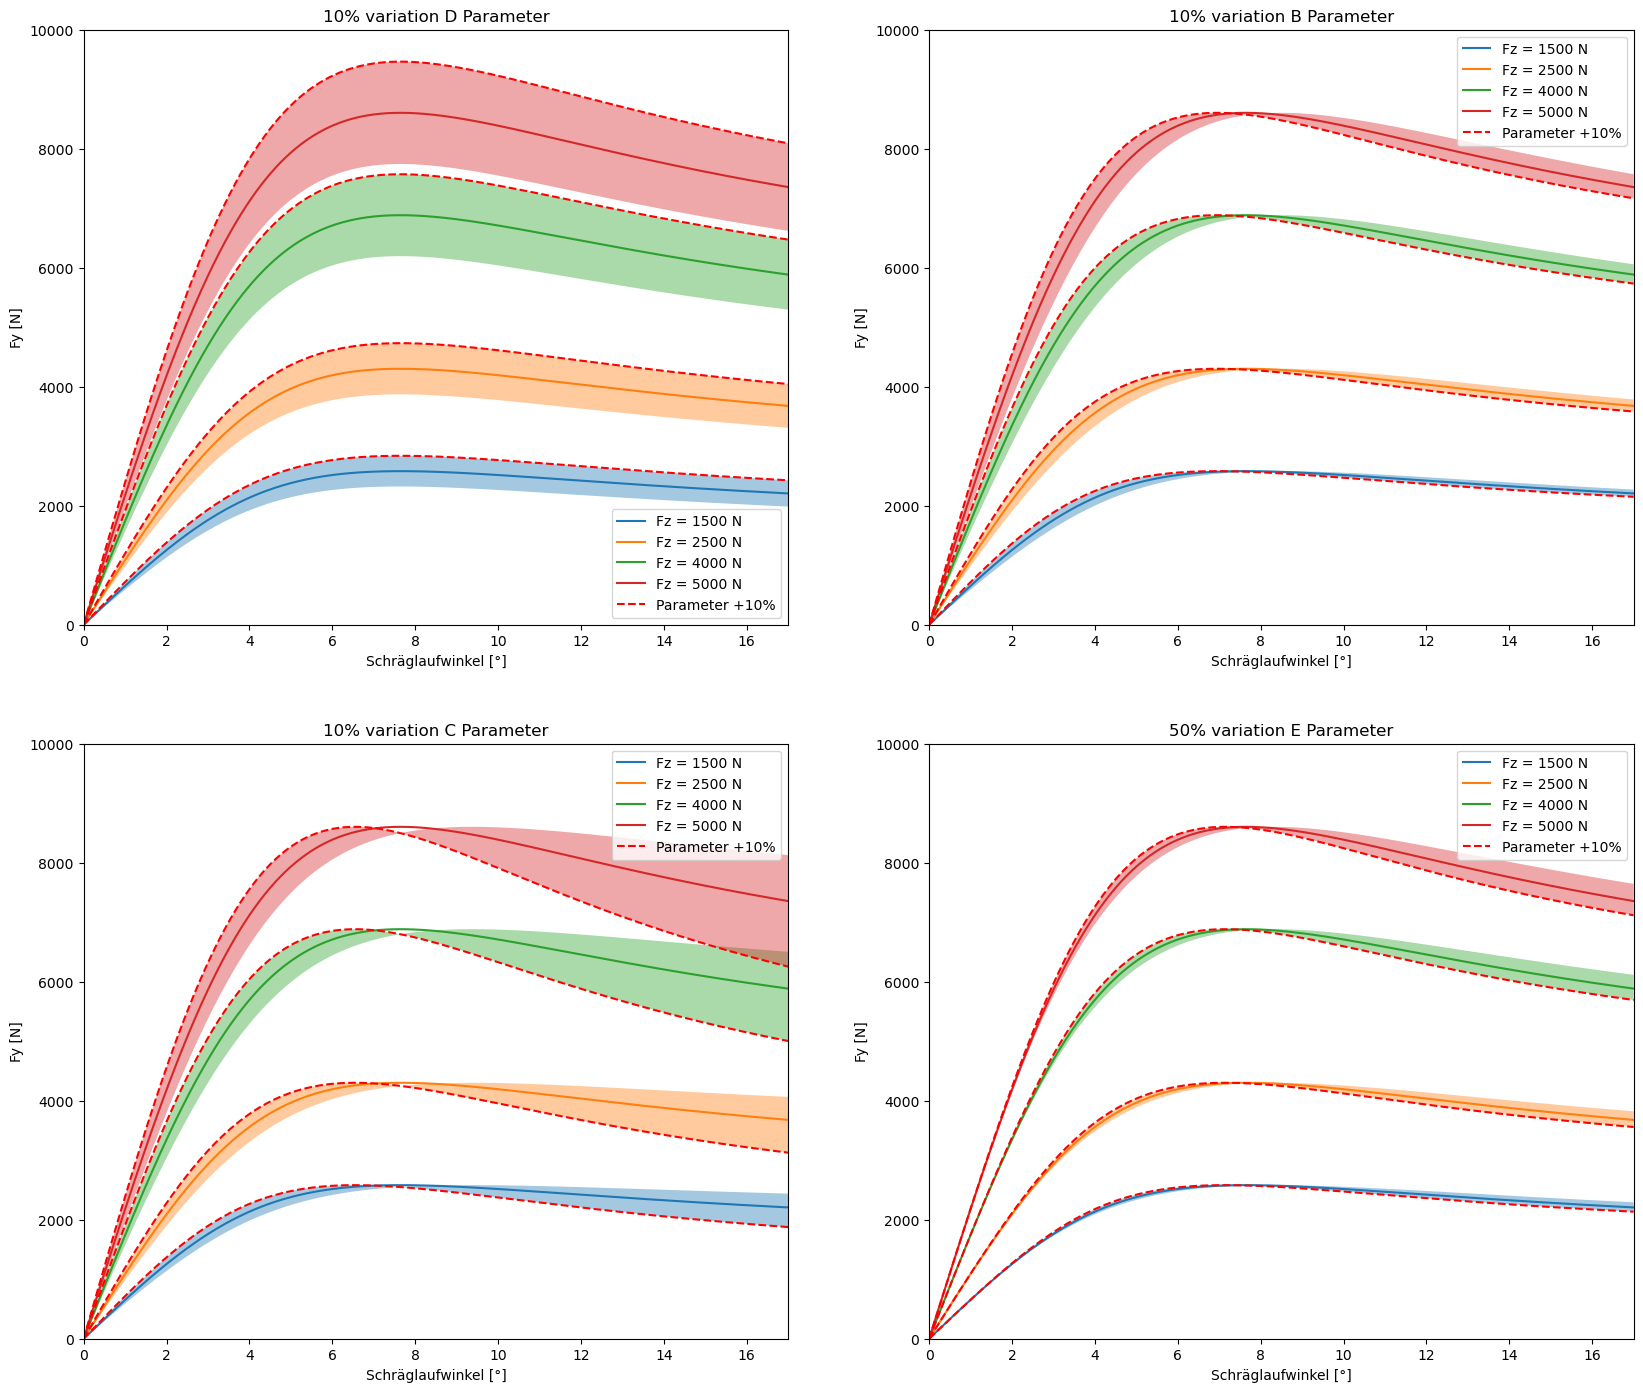

In [3]:
Fz = [1500, 2500, 4000, 5000]

Sy = np.linspace(0,0.3,1000)
B_lat = -9.06434405
C_lat = 1.60162373
D_lat = -1.72069169
E_lat = -0.80265574

fig, ax = plt.subplots(2,2, figsize = (20,17))

for j in range(len(Fz)):
    Fy = pa52. Pacejka5_lat_pa(Sy,Fz[j],B_lat,C_lat,D_lat,E_lat)
    ax[0, 0].plot(Sy_plt,Fy, label = f"Fz = {Fz[j]} N")

for j in range(len(Fz)):    
    D_lat_pos =  D_lat * 1.1
    Fy_pos = pa52. Pacejka5_lat_pa(Sy,Fz[j],B_lat,C_lat,D_lat_pos,E_lat)
    ax[0, 0].plot(Sy_plt,Fy_pos, 'r--')

    D_lat_neg =  D_lat * 0.9
    Fy_neg = pa52. Pacejka5_lat_pa(Sy,Fz[j],B_lat,C_lat,D_lat_neg,E_lat)
    #plt.plot(Sy_plt_plt,Fy_pos, 'r--')
    ax[0, 0].fill_between(Sy_plt,Fy_pos,Fy_neg,  alpha = 0.4)
ax[0,0].set_title('10% variation D Parameter')
ax[0,0].set_ylabel('Fy [N]')
ax[0,0].set_xlabel('Schräglaufwinkel [°]')
ax[0,0].set_xlim((0,17))
ax[0,0].set_ylim((0,10000))
ax[0,0].legend(labels = [f"Fz = {Fz[0]} N",f"Fz = {Fz[1]} N",f"Fz = {Fz[2]} N",f"Fz = {Fz[3]} N","Parameter +10%"])

for j in range(len(Fz)):
    Fy = pa52. Pacejka5_lat_pa(Sy,Fz[j],B_lat,C_lat,D_lat,E_lat)
    ax[0, 1].plot(Sy_plt,Fy, label = f"Fz = {Fz[j]} N")

for j in range(len(Fz)):    
    B_lat_pos =  B_lat * 1.1
    Fy_pos = pa52. Pacejka5_lat_pa(Sy,Fz[j],B_lat_pos,C_lat,D_lat,E_lat)
    ax[0, 1].plot(Sy_plt,Fy_pos, 'r--')

    B_lat_neg =  B_lat * 0.9
    Fy_neg = pa52. Pacejka5_lat_pa(Sy,Fz[j],B_lat_neg,C_lat,D_lat,E_lat)
    #plt.plot(Sy_plt_plt,Fy_pos, 'r--')
    ax[0, 1].fill_between(Sy_plt,Fy_pos,Fy_neg,  alpha = 0.4)
ax[0,1].set_title('10% variation B Parameter')
ax[0,1].set_ylabel('Fy [N]')
ax[0,1].set_xlabel('Schräglaufwinkel [°]')
ax[0,1].set_xlim((0,17))
ax[0,1].set_ylim((0,10000))
ax[0,1].legend(labels = [f"Fz = {Fz[0]} N",f"Fz = {Fz[1]} N",f"Fz = {Fz[2]} N",f"Fz = {Fz[3]} N","Parameter +10%"])

for j in range(len(Fz)):
    Fy = pa52. Pacejka5_lat_pa(Sy,Fz[j],B_lat,C_lat,D_lat,E_lat)
    ax[1, 0].plot(Sy_plt,Fy, label = f"Fz = {Fz[j]} N")

for j in range(len(Fz)):    
    C_lat_pos =  C_lat * 1.1
    Fy_pos = pa52. Pacejka5_lat_pa(Sy,Fz[j],B_lat,C_lat_pos,D_lat,E_lat)
    ax[1, 0].plot(Sy_plt,Fy_pos, 'r--')

    C_lat_neg =  C_lat * 0.9
    Fy_neg = pa52. Pacejka5_lat_pa(Sy,Fz[j],B_lat,C_lat_neg,D_lat,E_lat)
    #plt.plot(Sy_plt,Fy_pos, 'r--')
    ax[1, 0].fill_between(Sy_plt,Fy_pos,Fy_neg,  alpha = 0.4)
ax[1,0].set_title('10% variation C Parameter')
ax[1,0].set_ylabel('Fy [N]')
ax[1,0].set_xlabel('Schräglaufwinkel [°]')
ax[1,0].set_xlim((0,17))
ax[1,0].set_ylim((0,10000))
ax[1,0].legend(labels = [f"Fz = {Fz[0]} N",f"Fz = {Fz[1]} N",f"Fz = {Fz[2]} N",f"Fz = {Fz[3]} N","Parameter +10%"])

for j in range(len(Fz)):
    Fy = pa52. Pacejka5_lat_pa(Sy,Fz[j],B_lat,C_lat,D_lat,E_lat)
    ax[1, 1].plot(Sy_plt,Fy, label = f"Fz = {Fz[j]} N")

for j in range(len(Fz)):    
    E_lat_pos =  E_lat * 1.5
    Fy_pos = pa52. Pacejka5_lat_pa(Sy,Fz[j],B_lat,C_lat,D_lat,E_lat_pos)
    ax[1, 1].plot(Sy_plt,Fy_pos, 'r--')

    E_lat_neg =  E_lat * 0.5
    Fy_neg = pa52. Pacejka5_lat_pa(Sy,Fz[j],B_lat,C_lat,D_lat,E_lat_neg)
    #plt.plot(Sy_plt,Fy_pos, 'r--')
    ax[1, 1].fill_between(Sy_plt,Fy_pos,Fy_neg, alpha = 0.4)
ax[1,1].set_title('50% variation E Parameter')
ax[1,1].set_ylabel('Fy [N]')
ax[1,1].set_xlabel('Schräglaufwinkel [°]')
ax[1,1].set_xlim((0,17))
ax[1,1].set_ylim((0,10000))
ax[1,1].legend(labels = [f"Fz = {Fz[0]} N",f"Fz = {Fz[1]} N",f"Fz = {Fz[2]} N",f"Fz = {Fz[3]} N","Parameter +10%"])

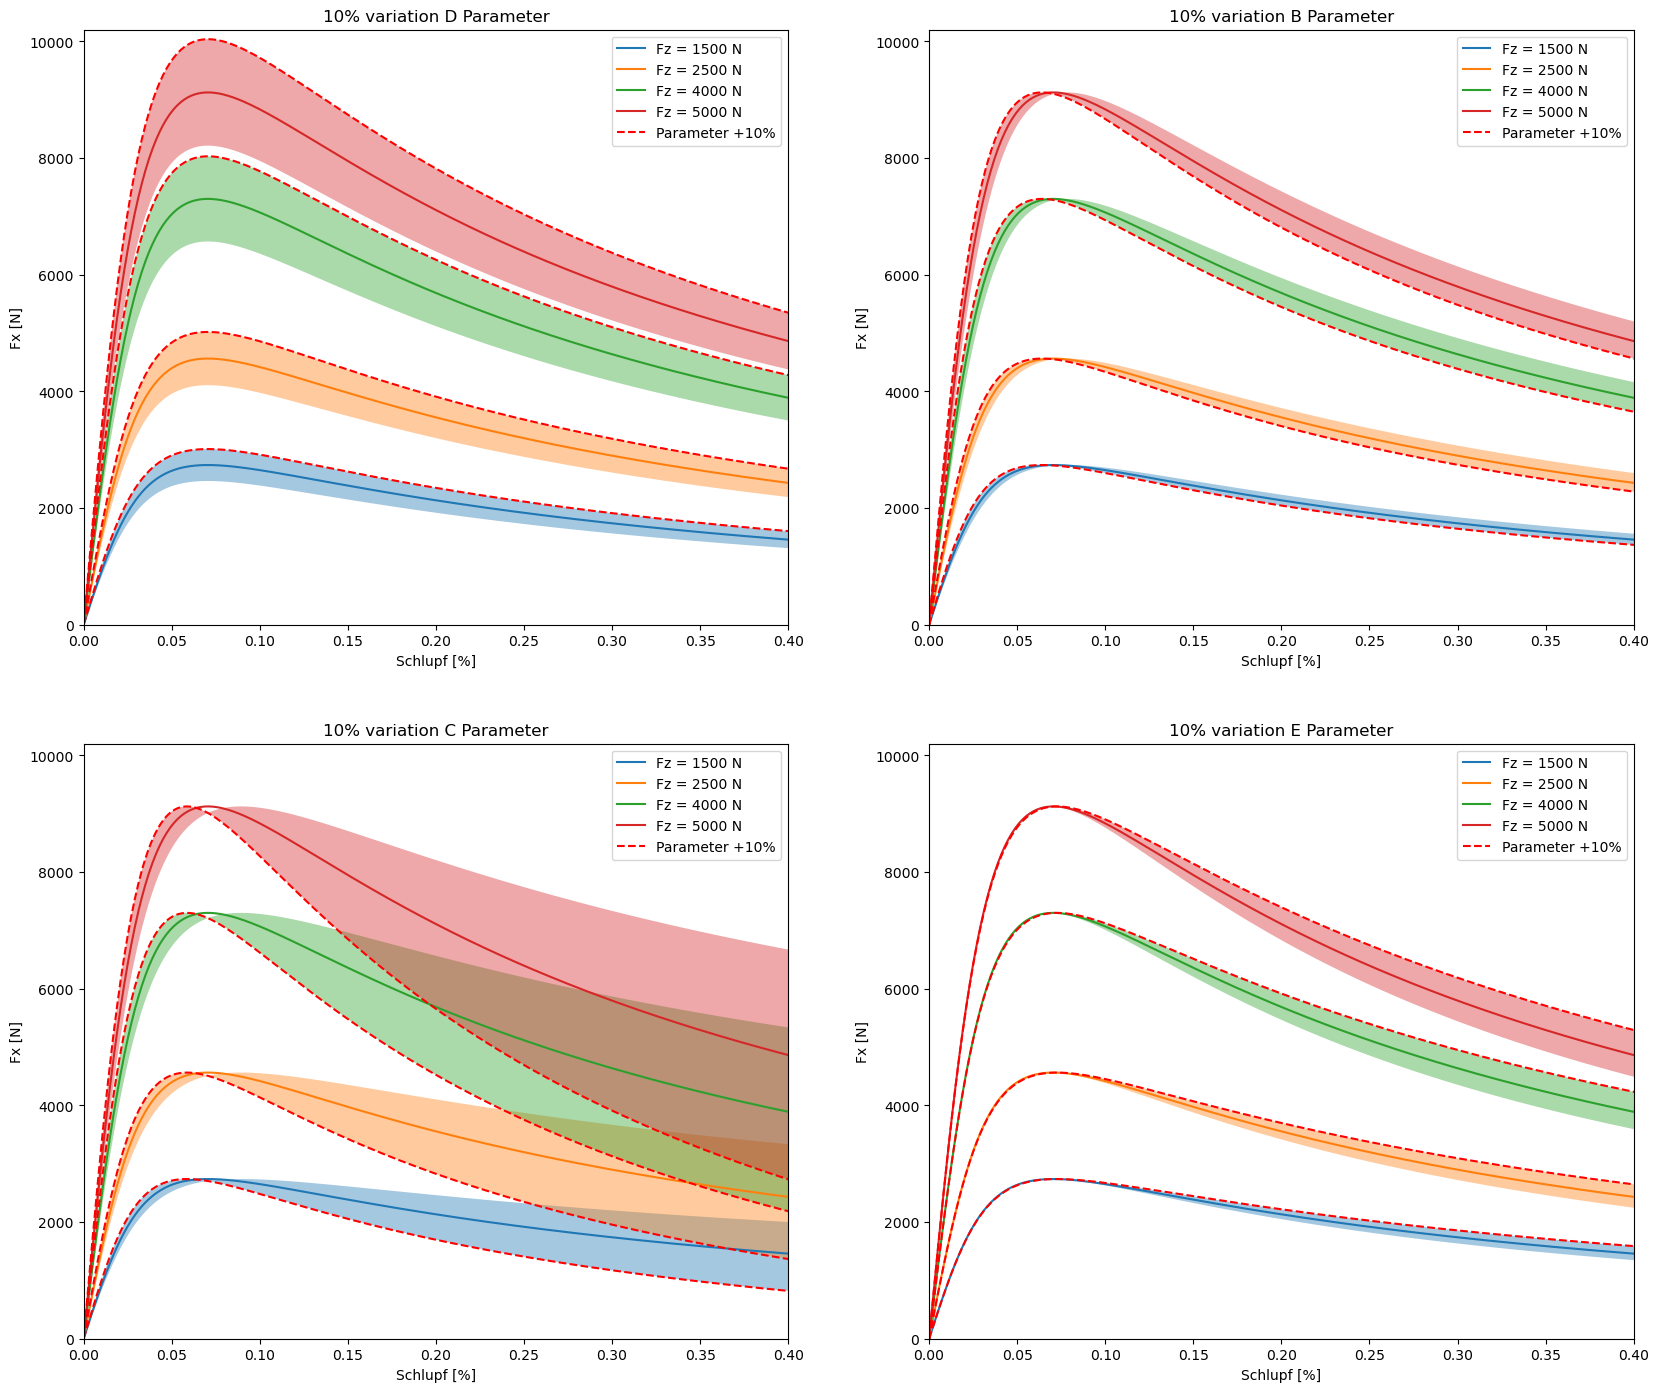

In [4]:
Fz = [1500, 2500, 4000, 5000]

Sx = np.linspace(0,1,1000)
B_long =17.04378049
C_long =1.99996234
D_long =1.82504605
E_long = 0.62177794


fig, ax = plt.subplots(2,2, figsize = (20,17))

for j in range(len(Fz)):
    Fx = pa52. Pacejka5_long_pa(Sx,Fz[j],B_long,C_long,D_long,E_long)
    ax[0, 0].plot(Sx,Fx, label = f"Fz = {Fz[j]} N")

for j in range(len(Fz)):    
    D_long_pos =  D_long * 1.1
    Fx_pos = pa52.Pacejka5_long_pa(Sx,Fz[j],B_long,C_long,D_long_pos,E_long)
    ax[0,0].plot(Sx,Fx_pos, 'r--')

    D_long_neg =  D_long * 0.9
    Fx_neg = pa52.Pacejka5_long_pa(Sx,Fz[j],B_long,C_long,D_long_neg,E_long)
    #plt.plot(Sy_plt,Fy_pos, 'r--')
    ax[0, 0].fill_between(Sx,Fx_pos,Fx_neg,  alpha = 0.4)
ax[0,0].set_title('10% variation D Parameter')
ax[0,0].set_ylabel('Fx [N]')
ax[0,0].set_xlabel('Schlupf [%]')
ax[0,0].set_xlim((0,0.4))
ax[0,0].set_ylim((0,10200))
ax[0,0].legend(labels = [f"Fz = {Fz[0]} N",f"Fz = {Fz[1]} N",f"Fz = {Fz[2]} N",f"Fz = {Fz[3]} N","Parameter +10%"])


for j in range(len(Fz)):
    Fx = pa52. Pacejka5_long_pa(Sx,Fz[j],B_long,C_long,D_long,E_long)
    ax[0, 1].plot(Sx,Fx, label = f"Fz = {Fz[j]} N")

for j in range(len(Fz)):    
    B_long_pos = B_long * 1.1
    Fx_pos = pa52.Pacejka5_long_pa(Sx,Fz[j],B_long_pos,C_long,D_long,E_long)
    ax[0,1].plot(Sx,Fx_pos, 'r--')

    B_long_neg =  B_long * 0.9
    Fx_neg = pa52.Pacejka5_long_pa(Sx,Fz[j],B_long_neg,C_long,D_long,E_long)
    #plt.plot(Sy_plt,Fy_pos, 'r--')
    ax[0, 1].fill_between(Sx,Fx_pos,Fx_neg,  alpha = 0.4)
ax[0,1].set_title('10% variation B Parameter')
ax[0,1].set_ylabel('Fx [N]')
ax[0,1].set_xlabel('Schlupf [%]')
ax[0,1].set_xlim((0,0.4))
ax[0,1].set_ylim((0,10200))
ax[0,1].legend(labels = [f"Fz = {Fz[0]} N",f"Fz = {Fz[1]} N",f"Fz = {Fz[2]} N",f"Fz = {Fz[3]} N","Parameter +10%"])

for j in range(len(Fz)):
    Fx = pa52.Pacejka5_long_pa(Sx,Fz[j],B_long,C_long,D_long,E_long)
    ax[1, 0].plot(Sx,Fx, label = f"Fz = {Fz[j]} N")

for j in range(len(Fz)):    
    C_long_pos = C_long * 1.1
    Fx_pos = pa52.Pacejka5_long_pa(Sx,Fz[j],B_long,C_long_pos,D_long,E_long)
    ax[1,0].plot(Sx,Fx_pos, 'r--')

    C_long_neg =  C_long * 0.9
    Fx_neg = pa52.Pacejka5_long_pa(Sx,Fz[j],B_long,C_long_neg,D_long,E_long)
    #plt.plot(Sy_plt,Fy_pos, 'r--')
    ax[1, 0].fill_between(Sx,Fx_pos,Fx_neg,  alpha = 0.4)
ax[1,0].set_title('10% variation C Parameter')
ax[1,0].set_ylabel('Fx [N]')
ax[1,0].set_xlabel('Schlupf [%]')
ax[1,0].set_xlim((0,0.4))
ax[1,0].set_ylim((0,10200))
ax[1,0].legend(labels = [f"Fz = {Fz[0]} N",f"Fz = {Fz[1]} N",f"Fz = {Fz[2]} N",f"Fz = {Fz[3]} N","Parameter +10%"])

for j in range(len(Fz)):
    Fx = pa52.Pacejka5_long_pa(Sx,Fz[j],B_long,C_long,D_long,E_long)
    ax[1, 1].plot(Sx,Fx, label = f"Fz = {Fz[j]} N")

for j in range(len(Fz)):    
    E_long_pos = E_long * 1.1
    Fx_pos = pa52.Pacejka5_long_pa(Sx,Fz[j],B_long,C_long,D_long,E_long_pos)
    ax[1,1].plot(Sx,Fx_pos, 'r--')

    E_long_neg =  E_long * 0.9
    Fx_neg = pa52.Pacejka5_long_pa(Sx,Fz[j],B_long,C_long,D_long,E_long_neg)
    #plt.plot(Sy_plt,Fy_pos, 'r--')
    ax[1, 1].fill_between(Sx,Fx_pos,Fx_neg,  alpha = 0.4)
ax[1,1].set_title('10% variation E Parameter')
ax[1,1].set_ylabel('Fx [N]')
ax[1,1].set_xlabel('Schlupf [%]')
ax[1,1].set_xlim((0,0.4))
ax[1,1].set_ylim((0,10200))
ax[1,1].legend(labels = [f"Fz = {Fz[0]} N",f"Fz = {Fz[1]} N",f"Fz = {Fz[2]} N",f"Fz = {Fz[3]} N","Parameter +10%"])

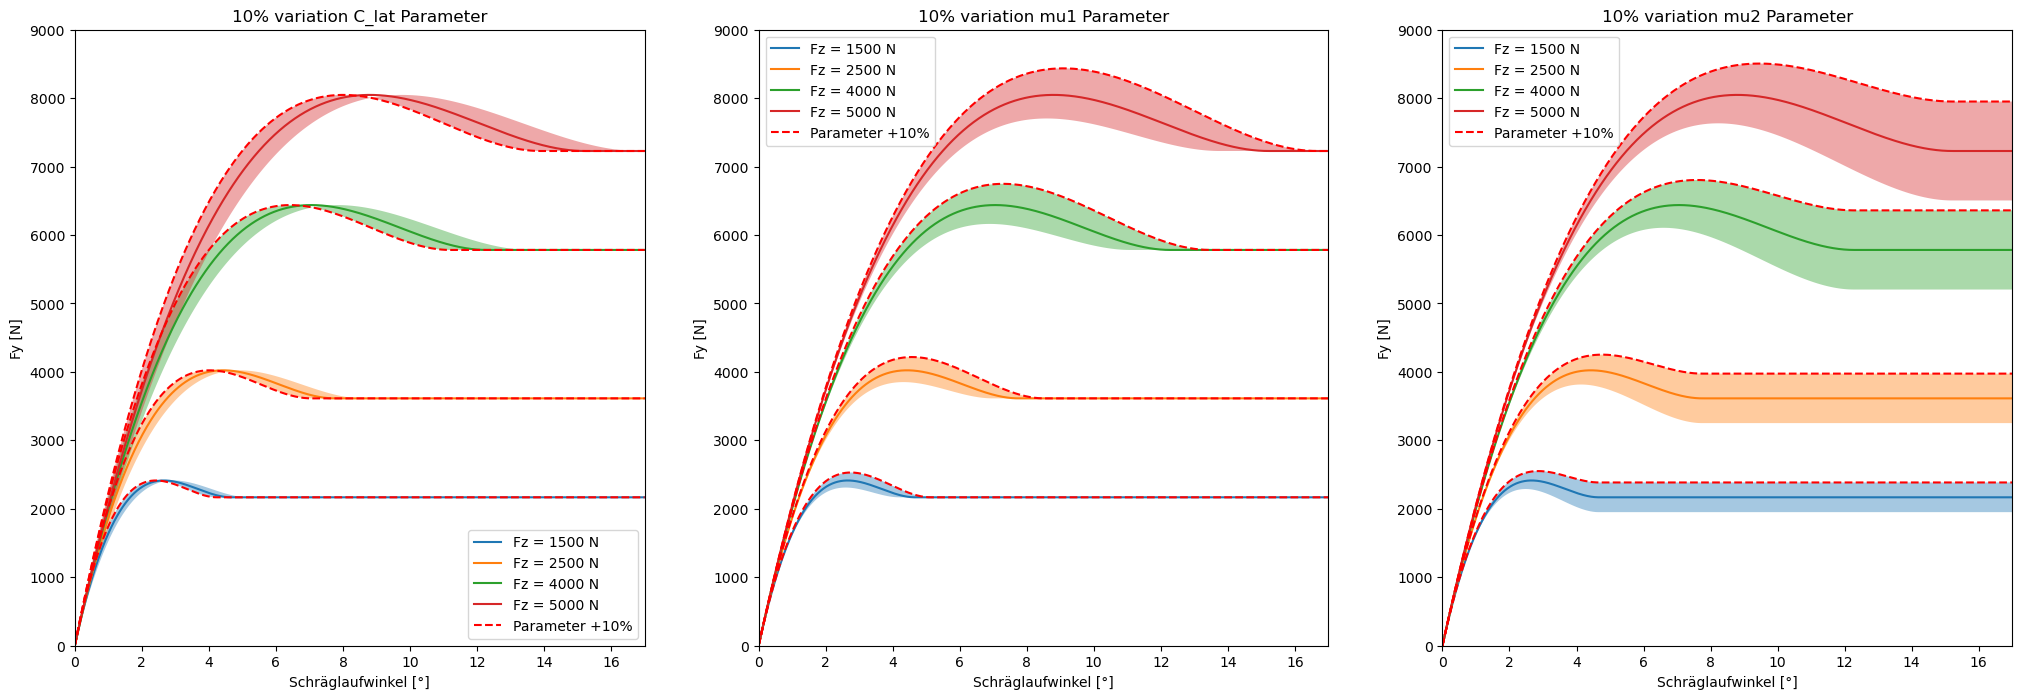

In [5]:
Fz = [1500, 2500, 4000, 5000]

Sy = np.linspace(0,0.3,1000)
C_lat = -1.26902260e+05
mu1 = -2.32752807e+00
mu2 = -1.44561563e+00

fig, ax = plt.subplots(1,3, figsize = (25,8))

for j in range(len(Fz)):
    Fy = fi.fiala_lat(Sy,Fz[j],C_lat,mu1,mu2)
    ax[0].plot(Sy_plt,Fy,label = f"Fz = {Fz[j]} N")

for j in range(len(Fz)):    
    C_lat_pos =  C_lat * 1.1
    Fy_pos = fi.fiala_lat(Sy,Fz[j],C_lat_pos,mu1,mu2)
    ax[0].plot(Sy_plt,Fy_pos, 'r--')

    C_lat_neg =  C_lat * 0.9
    Fy_neg = fi.fiala_lat(Sy,Fz[j],C_lat_neg,mu1,mu2)
    #plt.plot(Sy_plt,Fy_pos, 'r--')
    ax[0].fill_between(Sy_plt,Fy_pos,Fy_neg,  alpha = 0.4)
ax[0].set_title('10% variation C_lat Parameter')
ax[0].set_ylabel('Fy [N]')
ax[0].set_xlabel('Schräglaufwinkel [°]')
ax[0].set_xlim((0,17))
ax[0].set_ylim((0,9000))
ax[0].legend(labels = [f"Fz = {Fz[0]} N",f"Fz = {Fz[1]} N",f"Fz = {Fz[2]} N",f"Fz = {Fz[3]} N","Parameter +10%"])

for j in range(len(Fz)):
    Fy = fi.fiala_lat(Sy,Fz[j],C_lat,mu1,mu2)
    ax[1].plot(Sy_plt,Fy,label = f"Fz = {Fz[j]} N")

for j in range(len(Fz)):    
    mu1_pos =  mu1 * 1.1
    Fy_pos = fi.fiala_lat(Sy,Fz[j],C_lat,mu1_pos,mu2)
    ax[1].plot(Sy_plt,Fy_pos, 'r--')

    mu1_neg =  mu1 * 0.9
    Fy_neg = fi.fiala_lat(Sy,Fz[j],C_lat,mu1_neg,mu2)
    #plt.plot(Sy_plt,Fy_pos, 'r--')
    ax[ 1].fill_between(Sy_plt,Fy_pos,Fy_neg,  alpha = 0.4)
ax[1].set_title('10% variation mu1 Parameter')
ax[1].set_ylabel('Fy [N]')
ax[1].set_xlabel('Schräglaufwinkel [°]')
ax[1].set_xlim((0,17))
ax[1].set_ylim((0,9000))
ax[1].legend(labels = [f"Fz = {Fz[0]} N",f"Fz = {Fz[1]} N",f"Fz = {Fz[2]} N",f"Fz = {Fz[3]} N","Parameter +10%"])

for j in range(len(Fz)):
    Fy = fi.fiala_lat(Sy,Fz[j],C_lat,mu1,mu2)
    ax[2].plot(Sy_plt,Fy,label = f"Fz = {Fz[j]} N")

for j in range(len(Fz)):    
    mu2_pos =  mu2 * 1.1
    Fy_pos = fi.fiala_lat(Sy,Fz[j],C_lat,mu1,mu2_pos)
    ax[2].plot(Sy_plt,Fy_pos, 'r--')

    mu2_neg =  mu2 * 0.9
    Fy_neg = fi.fiala_lat(Sy,Fz[j],C_lat,mu1,mu2_neg)
    #plt.plot(Sy_plt,Fy_pos, 'r--')
    ax[2].fill_between(Sy_plt,Fy_pos,Fy_neg,  alpha = 0.4)
ax[2].set_title('10% variation mu2 Parameter')
ax[2].set_ylabel('Fy [N]')
ax[2].set_xlabel('Schräglaufwinkel [°]')
ax[2].set_xlim((0,17))
ax[2].set_ylim((0,9000))
ax[2].legend(labels = [f"Fz = {Fz[0]} N",f"Fz = {Fz[1]} N",f"Fz = {Fz[2]} N",f"Fz = {Fz[3]} N","Parameter +10%"])


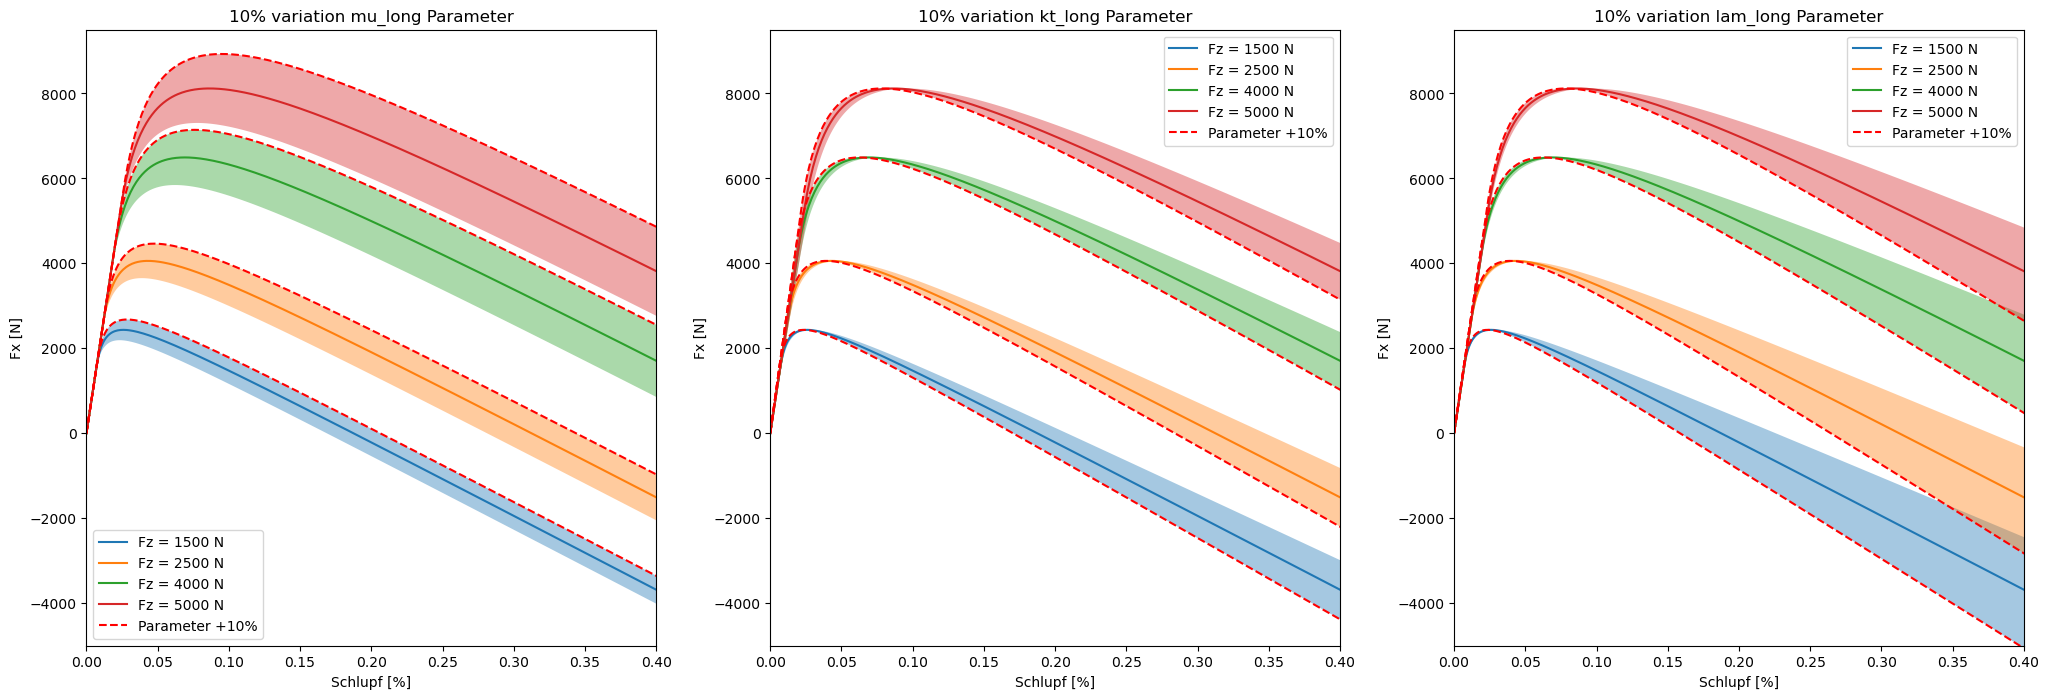

In [6]:
Fz = [1500, 2500, 4000, 5000]

Sx = np.linspace(0,1,1000)
mu_long  = 1.62344260e+00
kt_long  = 3.63683914e+06
lam_long = 3.10083340e-02

fig, ax = plt.subplots(1,3, figsize = (25,8))

for j in range(len(Fz)):
    Fx = br.brush_long(Sx,Fz[j],mu_long,kt_long,lam_long)
    ax[0].plot(Sx,Fx,label = f"Fz = {Fz[j]} N")

for j in range(len(Fz)):    
    mu_long_pos =  mu_long * 1.1
    Fx_pos = br.brush_long(Sx,Fz[j],mu_long_pos,kt_long,lam_long)
    ax[0].plot(Sx,Fx_pos, 'r--')

    mu_long_neg =  mu_long * 0.9
    Fx_neg = br.brush_long(Sx,Fz[j],mu_long_neg,kt_long,lam_long)
    #plt.plot(Sy_plt,Fy_pos, 'r--')
    ax[0].fill_between(Sx,Fx_pos,Fx_neg,  alpha = 0.4)
ax[0].set_title('10% variation mu_long Parameter')
ax[0].set_ylabel('Fx [N]')
ax[0].set_xlabel('Schlupf [%]')
ax[0].set_xlim((0,0.4))
ax[0].set_ylim((-5000,9500))
ax[0].legend(labels = [f"Fz = {Fz[0]} N",f"Fz = {Fz[1]} N",f"Fz = {Fz[2]} N",f"Fz = {Fz[3]} N","Parameter +10%"])

for j in range(len(Fz)):
    Fx = br.brush_long(Sx,Fz[j],mu_long,kt_long,lam_long)
    ax[1].plot(Sx,Fx,label = f"Fz = {Fz[j]} N")

for j in range(len(Fz)):    
    kt_long_pos =  kt_long * 1.1
    Fx_pos = br.brush_long(Sx,Fz[j],mu_long,kt_long_pos,lam_long)
    ax[1].plot(Sx,Fx_pos, 'r--')

    kt_long_neg =  kt_long * 0.9
    Fx_neg = br.brush_long(Sx,Fz[j],mu_long,kt_long_neg,lam_long)
    #plt.plot(Sy_plt,Fy_pos, 'r--')
    ax[1].fill_between(Sx,Fx_pos,Fx_neg,  alpha = 0.4)
ax[1].set_title('10% variation kt_long Parameter')
ax[1].set_ylabel('Fx [N]')
ax[1].set_xlabel('Schlupf [%]')
ax[1].set_xlim((0,0.4))
ax[1].set_ylim((-5000,9500))
ax[1].legend(labels = [f"Fz = {Fz[0]} N",f"Fz = {Fz[1]} N",f"Fz = {Fz[2]} N",f"Fz = {Fz[3]} N","Parameter +10%"])

for j in range(len(Fz)):
    Fx = br.brush_long(Sx,Fz[j],mu_long,kt_long,lam_long)
    ax[2].plot(Sx,Fx,label = f"Fz = {Fz[j]} N")

for j in range(len(Fz)):    
    lam_long_pos =  lam_long * 1.1
    Fx_pos = br.brush_long(Sx,Fz[j],mu_long,kt_long,lam_long_pos)
    ax[2].plot(Sx,Fx_pos, 'r--')

    lam_long_neg =  lam_long * 0.9
    Fx_neg = br.brush_long(Sx,Fz[j],mu_long,kt_long,lam_long_neg)
    #plt.plot(Sy_plt,Fy_pos, 'r--')
    ax[2].fill_between(Sx,Fx_pos,Fx_neg,  alpha = 0.4)
ax[2].set_title('10% variation lam_long Parameter')
ax[2].set_ylabel('Fx [N]')
ax[2].set_xlabel('Schlupf [%]')
ax[2].set_xlim((0,0.4))
ax[2].set_ylim((-5000,9500))
ax[2].legend(labels = [f"Fz = {Fz[0]} N",f"Fz = {Fz[1]} N",f"Fz = {Fz[2]} N",f"Fz = {Fz[3]} N","Parameter +10%"])

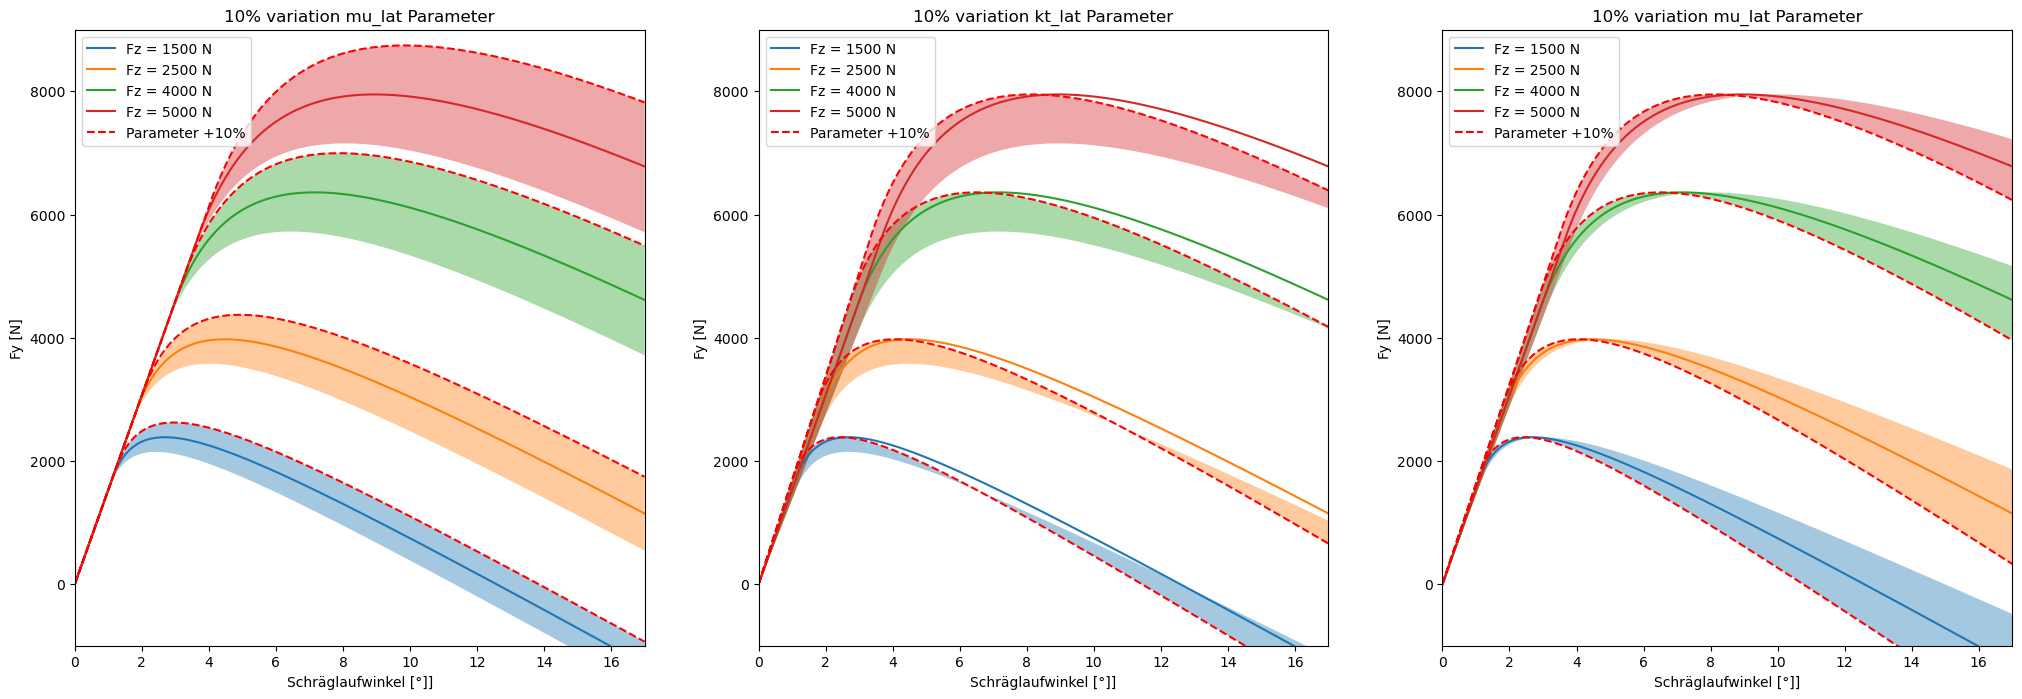

In [15]:
Fz = [1500, 2500, 4000, 5000]

#[1.58991258e+00 1.05121281e+06 5.74790914e-02]
Sx = np.linspace(0,1,1000)
mu_lat  = 1.58991258e+00
kt_lat  = 1.05121281e+06
lam_lat = 5.74790914e-02

fig, ax = plt.subplots(1,3, figsize = (25,8))

for j in range(len(Fz)):
    Fy = br.brush_lat(Sy,Fz[j],mu_lat,kt_lat,lam_lat)
    ax[0].plot(Sy_plt,Fy,label = f"Fz = {Fz[j]} N")

for j in range(len(Fz)):    
    mu_lat_pos =  mu_lat * 1.1
    Fy_pos = br.brush_lat(Sy,Fz[j],mu_lat_pos,kt_lat,lam_lat)
    ax[0].plot(Sy_plt,Fy_pos, 'r--')

    mu_lat_neg =  mu_lat * 0.9
    Fy_neg = br.brush_long(Sy,Fz[j],mu_lat_neg,kt_lat,lam_lat)
    #plt.plot(Sy_plt,Fy_pos, 'r--')
    ax[0].fill_between(Sy_plt,Fy_pos,Fy_neg,  alpha = 0.4)
ax[0].set_title('10% variation mu_lat Parameter')
ax[0].set_ylabel('Fy [N]')
ax[0].set_xlabel('Schräglaufwinkel [°]]')
ax[0].set_xlim((0,17))
ax[0].set_ylim((-1000,9000))
ax[0].legend(labels = [f"Fz = {Fz[0]} N",f"Fz = {Fz[1]} N",f"Fz = {Fz[2]} N",f"Fz = {Fz[3]} N","Parameter +10%"])

for j in range(len(Fz)):
    Fy = br.brush_lat(Sy,Fz[j],mu_lat,kt_lat,lam_lat)
    ax[1].plot(Sy_plt,Fy,label = f"Fz = {Fz[j]} N")

for j in range(len(Fz)):    
    kt_lat_pos =  kt_lat * 1.1
    Fy_pos = br.brush_lat(Sy,Fz[j],mu_lat,kt_lat_pos,lam_lat)
    ax[1].plot(Sy_plt,Fy_pos, 'r--')

    kt_lat_neg =  kt_lat * 0.9
    Fy_neg = br.brush_long(Sy,Fz[j],mu_lat_neg,kt_lat_neg,lam_lat)
    #plt.plot(Sy_plt,Fy_pos, 'r--')
    ax[1].fill_between(Sy_plt,Fy_pos,Fy_neg,  alpha = 0.4)
ax[1].set_title('10% variation kt_lat Parameter')
ax[1].set_ylabel('Fy [N]')
ax[1].set_xlabel('Schräglaufwinkel [°]]')
ax[1].set_xlim((0,17))
ax[1].set_ylim((-1000,9000))
ax[1].legend(labels = [f"Fz = {Fz[0]} N",f"Fz = {Fz[1]} N",f"Fz = {Fz[2]} N",f"Fz = {Fz[3]} N","Parameter +10%"])

for j in range(len(Fz)):
    Fy = br.brush_lat(Sy,Fz[j],mu_lat,kt_lat,lam_lat)
    ax[2].plot(Sy_plt,Fy,label = f"Fz = {Fz[j]} N")

for j in range(len(Fz)):    
    lam_lat_pos =  lam_lat * 1.1
    Fy_pos = br.brush_lat(Sy,Fz[j],mu_lat,kt_lat,lam_lat_pos)
    ax[2].plot(Sy_plt,Fy_pos, 'r--')

    lam_lat_neg =  lam_lat * 0.9
    Fy_neg = br.brush_long(Sy,Fz[j],mu_lat,kt_lat,lam_lat_neg)
    #plt.plot(Sy_plt,Fy_pos, 'r--')
    ax[2].fill_between(Sy_plt,Fy_pos,Fy_neg,  alpha = 0.4)
ax[2].set_title('10% variation mu_lat Parameter')
ax[2].set_ylabel('Fy [N]')
ax[2].set_xlabel('Schräglaufwinkel [°]]')
ax[2].set_xlim((0,17))
ax[2].set_ylim((-1000,9000))
ax[2].legend(labels = [f"Fz = {Fz[0]} N",f"Fz = {Fz[1]} N",f"Fz = {Fz[2]} N",f"Fz = {Fz[3]} N","Parameter +10%"])

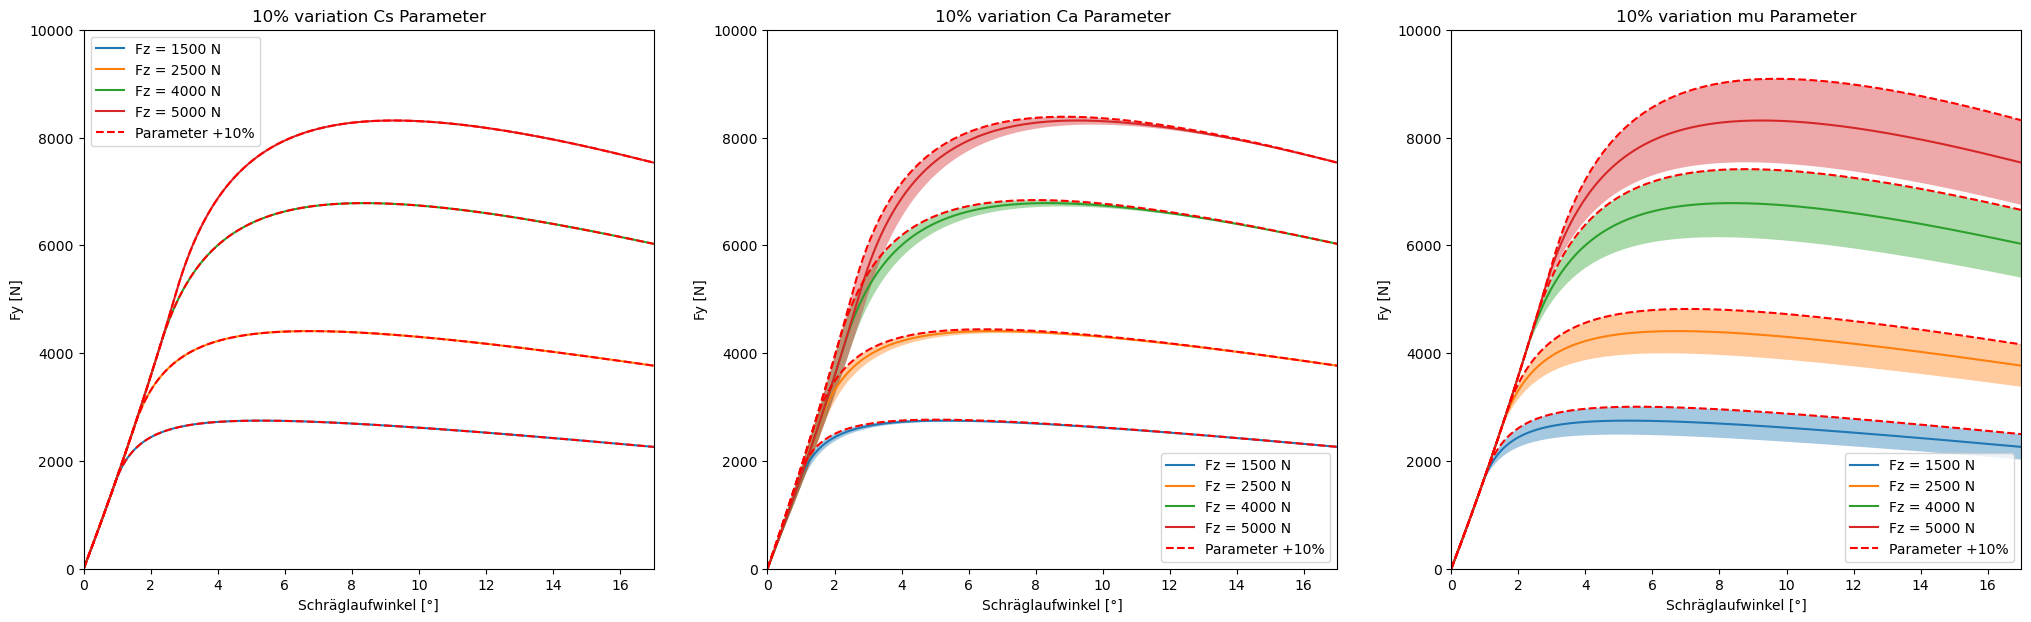

In [7]:
Fz = [1500, 2500, 4000, 5000]

Sy = np.linspace(0,0.3,1000)
Cs = 2.74289218e-01
Ca = 6.16477615e+03
mu = 1.43548745e-01


fig, ax = plt.subplots(1,3, figsize = (25,7))

for j in range(len(Fz)):
    Fy = du.dugoff_lo(Sx,Sy,Fz[j],Cs,Ca,mu)
    ax[0].plot(Sy_plt,Fy,label = f"Fz = {Fz[j]} N")

for j in range(len(Fz)):    
    Cs_pos =  Cs * 1.1
    Fy_pos = du.dugoff_lat(Sx,Sy,Fz[j],Cs_pos,Ca,mu)
    ax[0].plot(Sy_plt,Fy_pos, 'r--')

    Cs_neg =  Cs * 0.9
    Fy_neg = du.dugoff_lat(Sx,Sy,Fz[j],Cs_neg,Ca,mu)
    #plt.plot(Sy_plt,Fy_pos, 'r--')
    ax[0].fill_between(Sy_plt,Fy_pos,Fy_neg,  alpha = 0.6)
ax[0].set_title('10% variation Cs Parameter')
ax[0].set_ylabel('Fy [N]')
ax[0].set_xlabel('Schräglaufwinkel [°]')
ax[0].set_xlim((0,17))
ax[0].set_ylim((0,10000))
ax[0].legend(labels = [f"Fz = {Fz[0]} N",f"Fz = {Fz[1]} N",f"Fz = {Fz[2]} N",f"Fz = {Fz[3]} N","Parameter +10%"])


for j in range(len(Fz)):
    Fy = du.dugoff_lat(Sx,Sy,Fz[j],Cs,Ca,mu)
    ax[1].plot(Sy_plt,Fy,label = f"Fz = {Fz[j]} N")

for j in range(len(Fz)):    
    Ca_pos =  Ca * 1.1
    Fy_pos = du.dugoff_lat(Sx,Sy,Fz[j],Cs,Ca_pos,mu)
    ax[1].plot(Sy_plt,Fy_pos, 'r--')

    Ca_neg =  Ca * 0.9
    Fy_neg = du.dugoff_lat(Sx,Sy,Fz[j],Cs,Ca_neg,mu)
    #plt.plot(Sy_plt,Fy_pos, 'r--')
    ax[1].fill_between(Sy_plt,Fy_pos,Fy_neg,  alpha = 0.4)
ax[1].set_title('10% variation Ca Parameter')
ax[1].set_ylabel('Fy [N]')
ax[1].set_xlabel('Schräglaufwinkel [°]')
ax[1].set_xlim((0,17))
ax[1].set_ylim((0,10000))
ax[1].legend(labels = [f"Fz = {Fz[0]} N",f"Fz = {Fz[1]} N",f"Fz = {Fz[2]} N",f"Fz = {Fz[3]} N","Parameter +10%"])



for j in range(len(Fz)):
    Fy = du.dugoff_lat(Sx,Sy,Fz[j],Cs,Ca,mu)
    ax[2].plot(Sy_plt,Fy,label = f"Fz = {Fz[j]} N")

for j in range(len(Fz)):    
    mu_pos =  mu * 1.1
    Fy_pos = du.dugoff_lat(Sx,Sy,Fz[j],Cs,Ca,mu_pos)
    ax[2].plot(Sy_plt,Fy_pos, 'r--')

    mu_neg =  mu * 0.9
    Fy_neg = du.dugoff_lat(Sx,Sy,Fz[j],Cs,Ca,mu_neg)
    #plt.plot(Sy_plt,Fy_pos, 'r--')
    ax[2].fill_between(Sy_plt,Fy_pos,Fy_neg,  alpha = 0.4)
ax[2].set_title('10% variation mu Parameter')
ax[2].set_ylabel('Fy [N]')
ax[2].set_xlabel('Schräglaufwinkel [°]')
ax[2].set_xlim((0,17))
ax[2].set_ylim((0,10000))
ax[2].legend(labels = [f"Fz = {Fz[0]} N",f"Fz = {Fz[1]} N",f"Fz = {Fz[2]} N",f"Fz = {Fz[3]} N","Parameter +10%"])


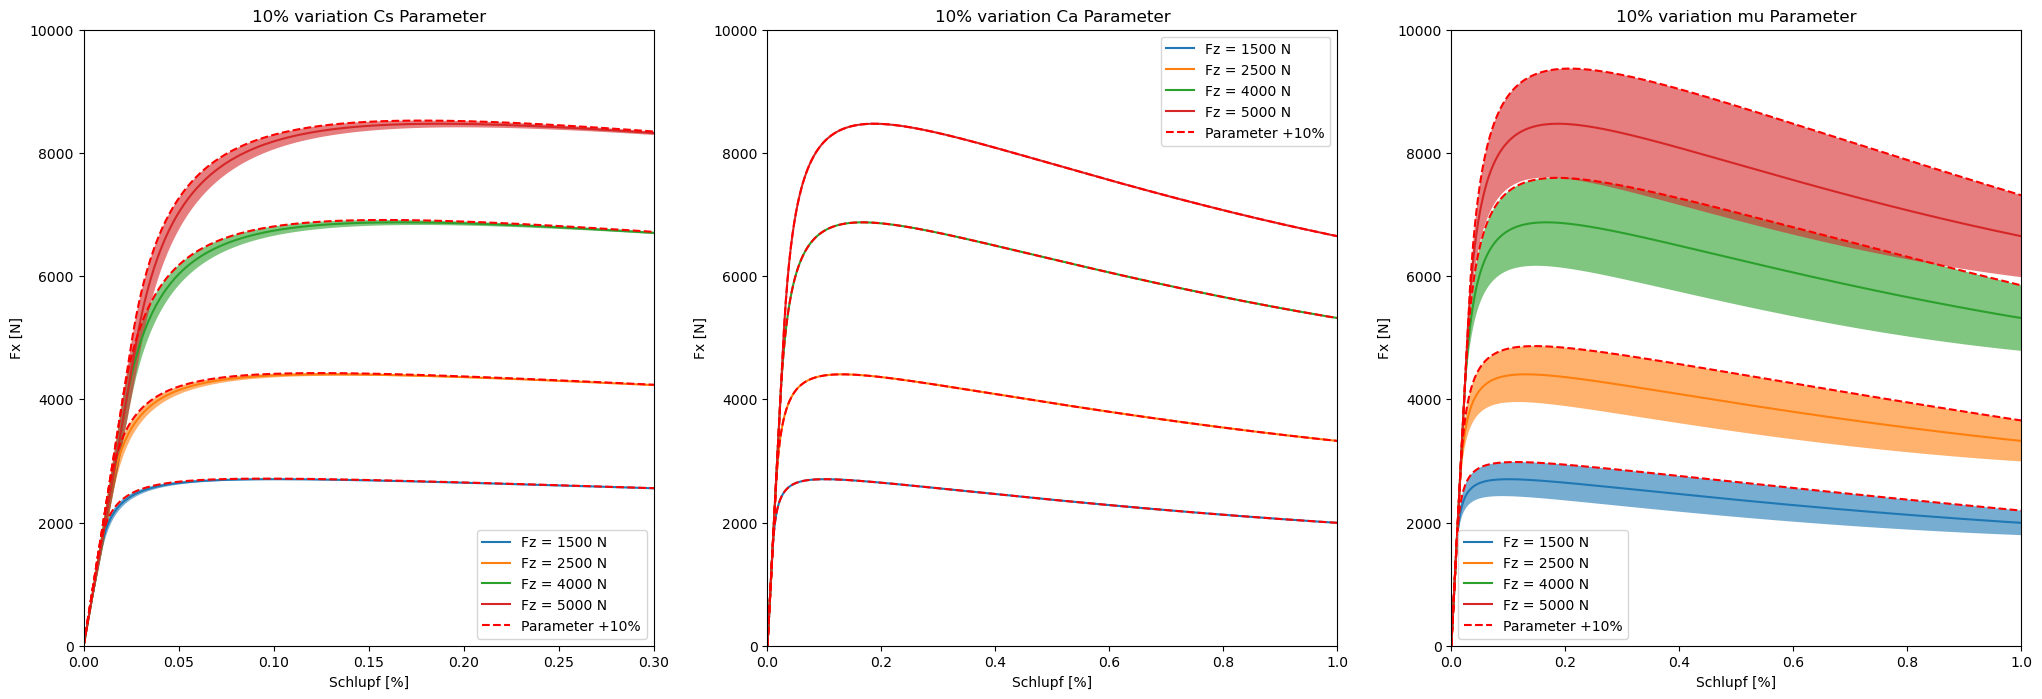

In [7]:
Fz = [1500, 2500, 4000, 5000]

Sx = np.linspace(0,1,1000)
Cs = 1.16724596e+05
Ca = -5.22466167e+00
mu = 1.30360646e+00

fig, ax = plt.subplots(1,3, figsize = (25,8))

for j in range(len(Fz)):
    Fx = du.dugoff_long(Sx,Sy,Fz[j],Cs,Ca,mu)
    ax[0].plot(Sx,Fx,label = f"Fz = {Fz[j]} N")

for j in range(len(Fz)):    
    Cs_pos =  Cs * 1.1
    Fx_pos = du.dugoff_long(Sx,Sy,Fz[j],Cs_pos,Ca,mu)
    ax[0].plot(Sx,Fx_pos, 'r--')

    Cs_neg =  Cs * 0.9
    Fx_neg = du.dugoff_long(Sx,Sy,Fz[j],Cs_neg,Ca,mu)
    #plt.plot(Sy_plt,Fy_pos, 'r--')
    ax[0].fill_between(Sx,Fx_pos,Fx_neg,  alpha = 0.6)
ax[0].set_title('10% variation Cs Parameter')
ax[0].set_ylabel('Fx [N]')
ax[0].set_xlabel('Schlupf [%]')
ax[0].set_xlim((0,0.3))
ax[0].set_ylim((0,10000))
ax[0].legend(labels = [f"Fz = {Fz[0]} N",f"Fz = {Fz[1]} N",f"Fz = {Fz[2]} N",f"Fz = {Fz[3]} N","Parameter +10%"])


for j in range(len(Fz)):
    Fx = du.dugoff_long(Sx,Sy,Fz[j],Cs,Ca,mu)
    ax[1].plot(Sx,Fx,label = f"Fz = {Fz[j]} N")

for j in range(len(Fz)):    
    Ca_pos =  Ca * 1.1
    Fx_pos = du.dugoff_long(Sx,Sy,Fz[j],Cs,Ca_pos,mu)
    ax[1].plot(Sx,Fx_pos, 'r--')

    Ca_neg =  Ca * 0.9
    Fx_neg = du.dugoff_long(Sx,Sy,Fz[j],Cs,Ca_neg,mu)
    #plt.plot(Sy_plt,Fy_pos, 'r--')
    ax[1].fill_between(Sx,Fx_pos,Fx_neg,  alpha = 0.6)
ax[1].set_title('10% variation Ca Parameter')
ax[1].set_ylabel('Fx [N]')
ax[1].set_xlabel('Schlupf [%]')
ax[1].set_xlim((0,1))
ax[1].set_ylim((0,10000))
ax[1].legend(labels = [f"Fz = {Fz[0]} N",f"Fz = {Fz[1]} N",f"Fz = {Fz[2]} N",f"Fz = {Fz[3]} N","Parameter +10%"])


for j in range(len(Fz)):
    Fx = du.dugoff_long(Sx,Sy,Fz[j],Cs,Ca,mu)
    ax[2].plot(Sx,Fx,label = f"Fz = {Fz[j]} N")

for j in range(len(Fz)):    
    mu_pos =  mu * 1.1
    Fx_pos = du.dugoff_long(Sx,Sy,Fz[j],Cs,Ca,mu_pos)
    ax[2].plot(Sx,Fx_pos, 'r--')

    mu_neg =  mu * 0.9
    Fx_neg = du.dugoff_long(Sx,Sy,Fz[j],Cs,Ca,mu_neg)
    #plt.plot(Sy_plt,Fy_pos, 'r--')
    ax[2].fill_between(Sx,Fx_pos,Fx_neg,  alpha = 0.6)
ax[2].set_title('10% variation mu Parameter')
ax[2].set_ylabel('Fx [N]')
ax[2].set_xlabel('Schlupf [%]')
ax[2].set_xlim((0,1))
ax[2].set_ylim((0,10000))
ax[2].legend(labels = [f"Fz = {Fz[0]} N",f"Fz = {Fz[1]} N",f"Fz = {Fz[2]} N",f"Fz = {Fz[3]} N","Parameter +10%"])



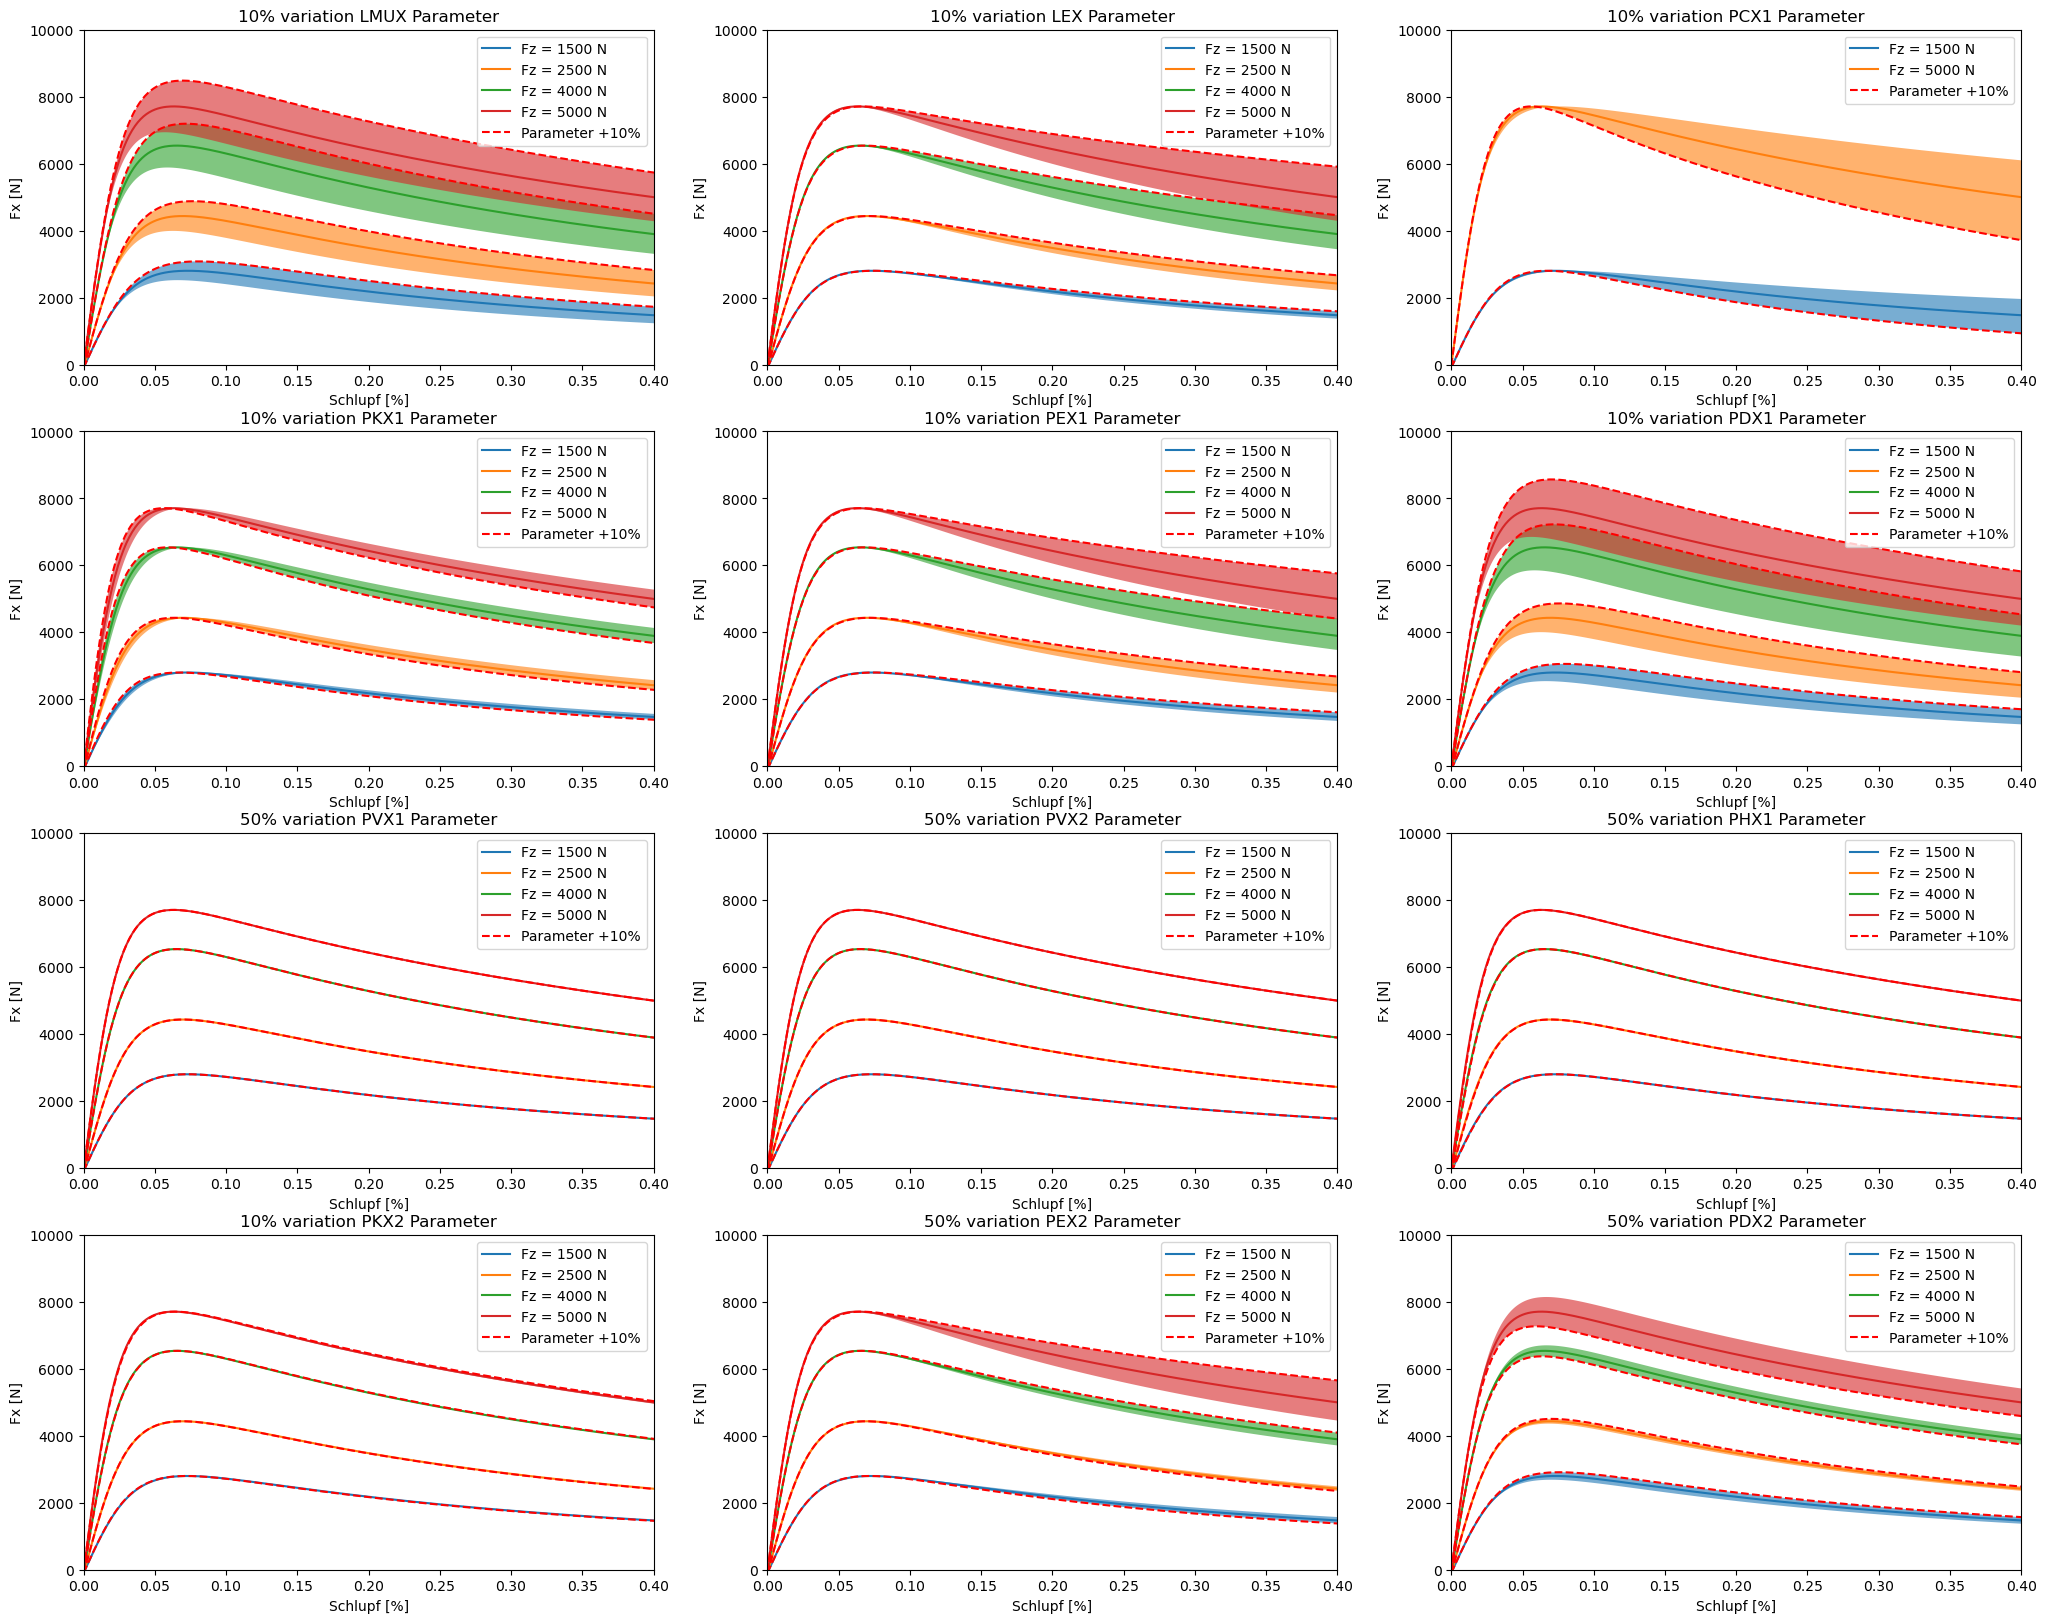

In [9]:
Fz = [1500, 2500, 4000, 5000]
Sx = np.linspace(0,1,1000)
Fz0 = 3114

fig, ax = plt.subplots(4,3, figsize = (25,20))

for j in range(len(Fz)):
    Fx = pa52gl.Pacejka52_long(Sx,Fz[j],Fz0,pa.PHX1, pa.PHX2, pa.PKX1, pa.PKX2, pa.PKX3, pa.PCX1, pa.PDX1, pa.PDX2, pa.PDX3, pa.PEX1, pa.PEX2, pa.PEX4, pa.PVX1, pa.PVX2, pa.LMUX, pa.LEX)[0]
    ax[0,0].plot(Sx,Fx,label = f"Fz = {Fz[j]} N")

for j in range(len(Fz)):    
    LMUX_pos =   pa.LMUX * 1.1
    Fx_pos = pa52gl.Pacejka52_long(Sx,Fz[j],Fz0,pa.PHX1, pa.PHX2, pa.PKX1, pa.PKX2, pa.PKX3, pa.PCX1, pa.PDX1, pa.PDX2, pa.PDX3, pa.PEX1, pa.PEX2, pa.PEX4, pa.PVX1, pa.PVX2, LMUX_pos, pa.LEX )[0]
    ax[0, 0].plot(Sx,Fx_pos, 'r--')

    LMUX_neg =   pa.LMUX * 0.9
    Fx_neg = pa52gl.Pacejka52_long(Sx,Fz[j],Fz0,pa.PHX1, pa.PHX2, pa.PKX1, pa.PKX2, pa.PKX3, pa.PCX1, pa.PDX1, pa.PDX2, pa.PDX3, pa.PEX1, pa.PEX2, pa.PEX4, pa.PVX1, pa.PVX2, LMUX_neg, pa.LEX )[0]
    ax[0,0].fill_between(Sx,Fx_pos,Fx_neg,  alpha = 0.6)

ax[0,0].set_title('10% variation LMUX Parameter')
ax[0,0].set_ylabel('Fx [N]')
ax[0,0].set_xlabel('Schlupf [%]')
ax[0,0].set_xlim((0,0.4))
ax[0,0].set_ylim((0,10000))
ax[0,0].legend(labels = [f"Fz = {Fz[0]} N",f"Fz = {Fz[1]} N",f"Fz = {Fz[2]} N",f"Fz = {Fz[3]} N","Parameter +10%"])

for j in range(len(Fz)):
    Fx = pa52gl.Pacejka52_long(Sx,Fz[j],Fz0,pa.PHX1, pa.PHX2, pa.PKX1, pa.PKX2, pa.PKX3, pa.PCX1, pa.PDX1, pa.PDX2, pa.PDX3, pa.PEX1, pa.PEX2, pa.PEX4, pa.PVX1, pa.PVX2, pa.LMUX, pa.LEX)[0]
    ax[1,2].plot(Sx,Fx,label = f"Fz = {Fz[j]} N")

for j in range(len(Fz)):    
    PDX1_pos =   pa.PDX1 * 1.1
    Fx_pos = pa52gl.Pacejka52_long(Sx,Fz[j],Fz0,pa.PHX1, pa.PHX2, pa.PKX1, pa.PKX2, pa.PKX3, pa.PCX1, PDX1_pos, pa.PDX2, pa.PDX3, pa.PEX1, pa.PEX2, pa.PEX4, pa.PVX1, pa.PVX2,  pa.LMUX, pa.LEX )[0]
    ax[1, 2].plot(Sx,Fx_pos, 'r--')

    PDX1_neg =   pa.PDX1 * 0.9
    Fx_neg = pa52gl.Pacejka52_long(Sx,Fz[j],Fz0,pa.PHX1, pa.PHX2, pa.PKX1, pa.PKX2, pa.PKX3, pa.PCX1, PDX1_neg, pa.PDX2, pa.PDX3, pa.PEX1, pa.PEX2, pa.PEX4, pa.PVX1, pa.PVX2,  pa.LMUX, pa.LEX )[0]
    ax[1,2].fill_between(Sx,Fx_pos,Fx_neg,  alpha = 0.6)
    
ax[1,2].set_title('10% variation PDX1 Parameter')
ax[1,2].set_ylabel('Fx [N]')
ax[1,2].set_xlabel('Schlupf [%]')
ax[1,2].set_xlim((0,0.4))
ax[1,2].set_ylim((0,10000))
ax[1,2].legend(labels = [f"Fz = {Fz[0]} N",f"Fz = {Fz[1]} N",f"Fz = {Fz[2]} N",f"Fz = {Fz[3]} N","Parameter +10%"])

for j in range(len(Fz)):
    Fx = pa52gl.Pacejka52_long(Sx,Fz[j],Fz0,pa.PHX1, pa.PHX2, pa.PKX1, pa.PKX2, pa.PKX3, pa.PCX1, pa.PDX1, pa.PDX2, pa.PDX3, pa.PEX1, pa.PEX2, pa.PEX4, pa.PVX1, pa.PVX2, pa.LMUX, pa.LEX)[0]
    ax[3,2].plot(Sx,Fx,label = f"Fz = {Fz[j]} N")

for j in range(len(Fz)):    
    PDX2_pos =   pa.PDX2 * 1.5
    Fx_pos = pa52gl.Pacejka52_long(Sx,Fz[j],Fz0,pa.PHX1, pa.PHX2, pa.PKX1, pa.PKX2, pa.PKX3, pa.PCX1, pa.PDX1,PDX2_pos, pa.PDX3, pa.PEX1, pa.PEX2, pa.PEX4, pa.PVX1, pa.PVX2,  pa.LMUX, pa.LEX )[0]
    ax[3, 2].plot(Sx,Fx_pos, 'r--')

    PDX2_neg =   pa.PDX2 * 0.5
    Fx_neg = pa52gl.Pacejka52_long(Sx,Fz[j],Fz0,pa.PHX1, pa.PHX2, pa.PKX1, pa.PKX2, pa.PKX3, pa.PCX1, pa.PDX1, PDX2_neg, pa.PDX3, pa.PEX1, pa.PEX2, pa.PEX4, pa.PVX1, pa.PVX2,  pa.LMUX, pa.LEX )[0]
    ax[3,2].fill_between(Sx,Fx_pos,Fx_neg,  alpha = 0.6)
    
ax[3,2].set_title('50% variation PDX2 Parameter')
ax[3,2].set_ylabel('Fx [N]')
ax[3,2].set_xlabel('Schlupf [%]')
ax[3,2].set_xlim((0,0.4))
ax[3,2].set_ylim((0,10000))
ax[3,2].legend(labels = [f"Fz = {Fz[0]} N",f"Fz = {Fz[1]} N",f"Fz = {Fz[2]} N",f"Fz = {Fz[3]} N","Parameter +10%"])

for j in range(len(Fz)):
    Fx = pa52gl.Pacejka52_long(Sx,Fz[j],Fz0,pa.PHX1, pa.PHX2, pa.PKX1, pa.PKX2, pa.PKX3, pa.PCX1, pa.PDX1, pa.PDX2, pa.PDX3, pa.PEX1, pa.PEX2, pa.PEX4, pa.PVX1, pa.PVX2, pa.LMUX, pa.LEX)[0]
    ax[1,0].plot(Sx,Fx,label = f"Fz = {Fz[j]} N")

for j in range(len(Fz)):    
    PKX1_pos =  pa.PKX1 * 1.1
    Fx_pos = pa52gl.Pacejka52_long(Sx,Fz[j],Fz0,pa.PHX1, pa.PHX2, PKX1_pos, pa.PKX2, pa.PKX3, pa.PCX1, pa.PDX1, pa.PDX2, pa.PDX3, pa.PEX1, pa.PEX2, pa.PEX4, pa.PVX1, pa.PVX2,  pa.LMUX, pa.LEX )[0]
    ax[1, 0].plot(Sx,Fx_pos, 'r--')

    PKX1_neg =   pa.PKX1 * 0.9
    Fx_neg = pa52gl.Pacejka52_long(Sx,Fz[j],Fz0,pa.PHX1, pa.PHX2, PKX1_neg, pa.PKX2, pa.PKX3, pa.PCX1, pa.PDX1,  pa.PDX2, pa.PDX3, pa.PEX1, pa.PEX2, pa.PEX4, pa.PVX1, pa.PVX2,  pa.LMUX, pa.LEX )[0]
    ax[1,0].fill_between(Sx,Fx_pos,Fx_neg,  alpha = 0.6)
    
ax[1,0].set_title('10% variation PKX1 Parameter')
ax[1,0].set_ylabel('Fx [N]')
ax[1,0].set_xlabel('Schlupf [%]')
ax[1,0].set_xlim((0,0.4))
ax[1,0].set_ylim((0,10000))
ax[1,0].legend(labels = [f"Fz = {Fz[0]} N",f"Fz = {Fz[1]} N",f"Fz = {Fz[2]} N",f"Fz = {Fz[3]} N","Parameter +10%"])

for j in range(len(Fz)):
    Fx = pa52gl.Pacejka52_long(Sx,Fz[j],Fz0,pa.PHX1, pa.PHX2, pa.PKX1, pa.PKX2, pa.PKX3, pa.PCX1, pa.PDX1, pa.PDX2, pa.PDX3, pa.PEX1, pa.PEX2, pa.PEX4, pa.PVX1, pa.PVX2, pa.LMUX, pa.LEX)[0]
    ax[1,1].plot(Sx,Fx,label = f"Fz = {Fz[j]} N")

for j in range(len(Fz)):    
    PEX1_pos =   pa.PEX1 * 1.1
    Fx_pos = pa52gl.Pacejka52_long(Sx,Fz[j],Fz0,pa.PHX1, pa.PHX2, pa.PKX1, pa.PKX2, pa.PKX3, pa.PCX1, pa.PDX1,pa.PDX2, pa.PDX3, PEX1_pos, pa.PEX2, pa.PEX4, pa.PVX1, pa.PVX2,  pa.LMUX, pa.LEX )[0]
    ax[1, 1].plot(Sx,Fx_pos, 'r--')

    PEX1_neg =   pa.PEX1 * 0.9
    Fx_neg = pa52gl.Pacejka52_long(Sx,Fz[j],Fz0,pa.PHX1, pa.PHX2, pa.PKX1, pa.PKX2, pa.PKX3, pa.PCX1, pa.PDX1, pa.PDX2, pa.PDX3, PEX1_neg, pa.PEX2, pa.PEX4, pa.PVX1, pa.PVX2,  pa.LMUX, pa.LEX )[0]
    ax[1,1].fill_between(Sx,Fx_pos,Fx_neg,  alpha = 0.6)
    
ax[1,1].set_title('10% variation PEX1 Parameter')
ax[1,1].set_ylabel('Fx [N]')
ax[1,1].set_xlabel('Schlupf [%]')
ax[1,1].set_xlim((0,0.4))
ax[1,1].set_ylim((0,10000))
ax[1,1].legend(labels = [f"Fz = {Fz[0]} N",f"Fz = {Fz[1]} N",f"Fz = {Fz[2]} N",f"Fz = {Fz[3]} N","Parameter +10%"])

for j in range(len(Fz)):
    Fx = pa52gl.Pacejka52_long(Sx,Fz[j],Fz0,pa.PHX1, pa.PHX2, pa.PKX1, pa.PKX2, pa.PKX3, pa.PCX1, pa.PDX1, pa.PDX2, pa.PDX3, pa.PEX1, pa.PEX2, pa.PEX4, pa.PVX1, pa.PVX2, pa.LMUX, pa.LEX)[0]
    ax[0,1].plot(Sx,Fx,label = f"Fz = {Fz[j]} N")

for j in range(len(Fz)):    
    LEX_pos =   pa.LEX * 1.1
    Fx_pos = pa52gl.Pacejka52_long(Sx,Fz[j],Fz0,pa.PHX1, pa.PHX2, pa.PKX1, pa.PKX2, pa.PKX3, pa.PCX1, pa.PDX1,pa.PDX2, pa.PDX3, pa.PEX1, pa.PEX2, pa.PEX4, pa.PVX1, pa.PVX2,  pa.LMUX, LEX_pos )[0]
    ax[0, 1].plot(Sx,Fx_pos, 'r--')

    LEX_neg =   pa.LEX * 0.9
    Fx_neg = pa52gl.Pacejka52_long(Sx,Fz[j],Fz0,pa.PHX1, pa.PHX2, pa.PKX1, pa.PKX2, pa.PKX3, pa.PCX1, pa.PDX1, pa.PDX2, pa.PDX3, pa.PEX1, pa.PEX2, pa.PEX4, pa.PVX1, pa.PVX2,  pa.LMUX, LEX_neg )[0]
    ax[0,1].fill_between(Sx,Fx_pos,Fx_neg,  alpha = 0.6)
    
ax[0,1].set_title('10% variation LEX Parameter')
ax[0,1].set_ylabel('Fx [N]')
ax[0,1].set_xlabel('Schlupf [%]')
ax[0,1].set_xlim((0,0.4))
ax[0,1].set_ylim((0,10000))
ax[0,1].legend(labels = [f"Fz = {Fz[0]} N",f"Fz = {Fz[1]} N",f"Fz = {Fz[2]} N",f"Fz = {Fz[3]} N","Parameter +10%"])


for j in range(len(Fz)):
    Fx = pa52gl.Pacejka52_long(Sx,Fz[j],Fz0,pa.PHX1, pa.PHX2, pa.PKX1, pa.PKX2, pa.PKX3, pa.PCX1, pa.PDX1, pa.PDX2, pa.PDX3, pa.PEX1, pa.PEX2, pa.PEX4, pa.PVX1, pa.PVX2, pa.LMUX, pa.LEX)[0]
    ax[2,0].plot(Sx,Fx,label = f"Fz = {Fz[j]} N")

for j in range(len(Fz)):    
    PVX1_pos =   pa.PVX1 * 1.5
    Fx_pos = pa52gl.Pacejka52_long(Sx,Fz[j],Fz0,pa.PHX1, pa.PHX2, pa.PKX1, pa.PKX2, pa.PKX3, pa.PCX1, pa.PDX1,pa.PDX2, pa.PDX3, pa.PEX1, pa.PEX2, pa.PEX4,PVX1_pos, pa.PVX2,  pa.LMUX,pa.LEX )[0]
    ax[2, 0].plot(Sx,Fx_pos, 'r--')

    PVX1_neg =   pa.PVX1 * 0.5
    Fx_neg = pa52gl.Pacejka52_long(Sx,Fz[j],Fz0,pa.PHX1, pa.PHX2, pa.PKX1, pa.PKX2, pa.PKX3, pa.PCX1, pa.PDX1, pa.PDX2, pa.PDX3, pa.PEX1, pa.PEX2, pa.PEX4, PVX1_neg, pa.PVX2,  pa.LMUX, pa.LEX )[0]
    ax[2,0].fill_between(Sx,Fx_pos,Fx_neg,  alpha = 0.6)
    
ax[2,0].set_title('50% variation PVX1 Parameter')
ax[2,0].set_ylabel('Fx [N]')
ax[2,0].set_xlabel('Schlupf [%]')
ax[2,0].set_xlim((0,0.4))
ax[2,0].set_ylim((0,10000))
ax[2,0].legend(labels = [f"Fz = {Fz[0]} N",f"Fz = {Fz[1]} N",f"Fz = {Fz[2]} N",f"Fz = {Fz[3]} N","Parameter +10%"])

for j in range(len(Fz)):
    Fx = pa52gl.Pacejka52_long(Sx,Fz[j],Fz0,pa.PHX1, pa.PHX2, pa.PKX1, pa.PKX2, pa.PKX3, pa.PCX1, pa.PDX1, pa.PDX2, pa.PDX3, pa.PEX1, pa.PEX2, pa.PEX4, pa.PVX1, pa.PVX2, pa.LMUX, pa.LEX)[0]
    ax[2,1].plot(Sx,Fx,label = f"Fz = {Fz[j]} N")

for j in range(len(Fz)):    
    PVX2_pos =   pa.PVX2 * 1.5
    Fx_pos = pa52gl.Pacejka52_long(Sx,Fz[j],Fz0,pa.PHX1, pa.PHX2, pa.PKX1, pa.PKX2, pa.PKX3, pa.PCX1, pa.PDX1,pa.PDX2, pa.PDX3, pa.PEX1, pa.PEX2, pa.PEX4,pa.PVX1, PVX2_pos,  pa.LMUX,pa.LEX )[0]
    ax[2, 1].plot(Sx,Fx_pos, 'r--')

    PVX2_neg =   pa.PVX2 * 0.5
    Fx_neg = pa52gl.Pacejka52_long(Sx,Fz[j],Fz0,pa.PHX1, pa.PHX2, pa.PKX1, pa.PKX2, pa.PKX3, pa.PCX1, pa.PDX1, pa.PDX2, pa.PDX3, pa.PEX1, pa.PEX2, pa.PEX4, pa.PVX1, PVX2_neg,  pa.LMUX, pa.LEX )[0]
    ax[2,1].fill_between(Sx,Fx_pos,Fx_neg,  alpha = 0.6)
    
ax[2,1].set_title('50% variation PVX2 Parameter')
ax[2,1].set_ylabel('Fx [N]')
ax[2,1].set_xlabel('Schlupf [%]')
ax[2,1].set_xlim((0,0.4))
ax[2,1].set_ylim((0,10000))
ax[2,1].legend(labels = [f"Fz = {Fz[0]} N",f"Fz = {Fz[1]} N",f"Fz = {Fz[2]} N",f"Fz = {Fz[3]} N","Parameter +10%"])

for j in range(len(Fz)):
    Fx = pa52gl.Pacejka52_long(Sx,Fz[j],Fz0,pa.PHX1, pa.PHX2, pa.PKX1, pa.PKX2, pa.PKX3, pa.PCX1, pa.PDX1, pa.PDX2, pa.PDX3, pa.PEX1, pa.PEX2, pa.PEX4, pa.PVX1, pa.PVX2, pa.LMUX, pa.LEX)[0]
    ax[2,2].plot(Sx,Fx,label = f"Fz = {Fz[j]} N")

for j in range(len(Fz)):    
    PHX1_pos = pa.PHX1 * 1.5
    Fx_pos = pa52gl.Pacejka52_long(Sx,Fz[j],Fz0,PHX1_pos, pa.PHX2, pa.PKX1, pa.PKX2, pa.PKX3, pa.PCX1, pa.PDX1,pa.PDX2, pa.PDX3, pa.PEX1, pa.PEX2, pa.PEX4,pa.PVX1, pa.PVX2,  pa.LMUX,pa.LEX )[0]
    ax[2, 2].plot(Sx,Fx_pos, 'r--')

    PHX1_neg = pa.PHX1 * 0.5
    Fx_neg = pa52gl.Pacejka52_long(Sx,Fz[j],Fz0,PHX1_neg, pa.PHX2, pa.PKX1, pa.PKX2, pa.PKX3, pa.PCX1, pa.PDX1, pa.PDX2, pa.PDX3, pa.PEX1, pa.PEX2, pa.PEX4, pa.PVX1, pa.PVX2,  pa.LMUX, pa.LEX )[0]
    ax[2,2].fill_between(Sx,Fx_pos,Fx_neg,  alpha = 0.6)
    
ax[2,2].set_title('50% variation PHX1 Parameter')
ax[2,2].set_ylabel('Fx [N]')
ax[2,2].set_xlabel('Schlupf [%]')
ax[2,2].set_xlim((0,0.4))
ax[2,2].set_ylim((0,10000))
ax[2,2].legend(labels = [f"Fz = {Fz[0]} N",f"Fz = {Fz[1]} N",f"Fz = {Fz[2]} N",f"Fz = {Fz[3]} N","Parameter +10%"])


for j in range(len(Fz)):
    Fx = pa52gl.Pacejka52_long(Sx,Fz[j],Fz0,pa.PHX1, pa.PHX2, pa.PKX1, pa.PKX2, pa.PKX3, pa.PCX1, pa.PDX1, pa.PDX2, pa.PDX3, pa.PEX1, pa.PEX2, pa.PEX4, pa.PVX1, pa.PVX2, pa.LMUX, pa.LEX)[0]
    ax[3,0].plot(Sx,Fx,label = f"Fz = {Fz[j]} N")

for j in range(len(Fz)):    
    PKX2_pos =    pa.PKX2 * 1.1
    Fx_pos = pa52gl.Pacejka52_long(Sx,Fz[j],Fz0,pa.PHX1, pa.PHX2, pa.PKX1, PKX2_pos, pa.PKX3, pa.PCX1, pa.PDX1,pa.PDX2, pa.PDX3, pa.PEX1, pa.PEX2, pa.PEX4,pa.PVX1, pa.PVX2,  pa.LMUX,pa.LEX )[0]
    ax[3, 0].plot(Sx,Fx_pos, 'r--')

    PKX2_neg =   pa.PKX2 * 0.9
    Fx_neg = pa52gl.Pacejka52_long(Sx,Fz[j],Fz0,pa.PHX1, pa.PHX2, pa.PKX1, PKX2_neg, pa.PKX3, pa.PCX1, pa.PDX1, pa.PDX2, pa.PDX3, pa.PEX1, pa.PEX2, pa.PEX4, pa.PVX1, pa.PVX2,  pa.LMUX, pa.LEX )[0]
    ax[3,0].fill_between(Sx,Fx_pos,Fx_neg,  alpha = 0.6)
    
ax[3,0].set_title('10% variation PKX2 Parameter')
ax[3,0].set_ylabel('Fx [N]')
ax[3,0].set_xlabel('Schlupf [%]')
ax[3,0].set_xlim((0,0.4))
ax[3,0].set_ylim((0,10000))
ax[3,0].legend(labels = [f"Fz = {Fz[0]} N",f"Fz = {Fz[1]} N",f"Fz = {Fz[2]} N",f"Fz = {Fz[3]} N","Parameter +10%"])

for j in range(len(Fz)):
    Fx = pa52gl.Pacejka52_long(Sx,Fz[j],Fz0,pa.PHX1, pa.PHX2, pa.PKX1, pa.PKX2, pa.PKX3, pa.PCX1, pa.PDX1, pa.PDX2, pa.PDX3, pa.PEX1, pa.PEX2, pa.PEX4, pa.PVX1, pa.PVX2, pa.LMUX, pa.LEX)[0]
    ax[3,1].plot(Sx,Fx,label = f"Fz = {Fz[j]} N")

for j in range(len(Fz)):    
    PEX2_pos =   pa.PEX2 * 1.5
    Fx_pos = pa52gl.Pacejka52_long(Sx,Fz[j],Fz0,pa.PHX1, pa.PHX2, pa.PKX1, pa.PKX2, pa.PKX3, pa.PCX1, pa.PDX1,pa.PDX2, pa.PDX3, pa.PEX1, PEX2_pos, pa.PEX4,pa.PVX1, pa.PVX2,  pa.LMUX,pa.LEX )[0]
    ax[3, 1].plot(Sx,Fx_pos, 'r--')

    PEX2_neg =   pa.PEX2 * 0.5
    Fx_neg = pa52gl.Pacejka52_long(Sx,Fz[j],Fz0,pa.PHX1, pa.PHX2, pa.PKX1, pa.PKX2, pa.PKX3, pa.PCX1, pa.PDX1, pa.PDX2, pa.PDX3, pa.PEX1,PEX2_neg, pa.PEX4, pa.PVX1, pa.PVX2,  pa.LMUX, pa.LEX )[0]
    ax[3,1].fill_between(Sx,Fx_pos,Fx_neg,  alpha = 0.6)
    
ax[3,1].set_title('50% variation PEX2 Parameter')
ax[3,1].set_ylabel('Fx [N]')
ax[3,1].set_xlabel('Schlupf [%]')
ax[3,1].set_xlim((0,0.4))
ax[3,1].set_ylim((0,10000))
ax[3,1].legend(labels = [f"Fz = {Fz[0]} N",f"Fz = {Fz[1]} N",f"Fz = {Fz[2]} N",f"Fz = {Fz[3]} N","Parameter +10%"])

Fz = [1500, 5000]
for j in range(len(Fz)):
    Fx = pa52gl.Pacejka52_long(Sx,Fz[j],Fz0,pa.PHX1, pa.PHX2, pa.PKX1, pa.PKX2, pa.PKX3, pa.PCX1, pa.PDX1, pa.PDX2, pa.PDX3, pa.PEX1, pa.PEX2, pa.PEX4, pa.PVX1, pa.PVX2, pa.LMUX, pa.LEX)[0]
    ax[0,2].plot(Sx,Fx,label = f"Fz = {Fz[j]} N")

for j in range(len(Fz)):    
    PCX1_pos = pa.PCX1 * 1.1
    Fx_pos = pa52gl.Pacejka52_long(Sx,Fz[j],Fz0,pa.PHX1, pa.PHX2, pa.PKX1, pa.PKX2, pa.PKX3, PCX1_pos, pa.PDX1,pa.PDX2, pa.PDX3, pa.PEX1, pa.PEX2, pa.PEX4,pa.PVX1, pa.PVX2,  pa.LMUX,pa.LEX )[0]
    ax[0, 2].plot(Sx,Fx_pos, 'r--')

    PCX1_neg = pa.PCX1 * 0.9
    Fx_neg = pa52gl.Pacejka52_long(Sx,Fz[j],Fz0,pa.PHX1, pa.PHX2, pa.PKX1, pa.PKX2, pa.PKX3, PCX1_neg, pa.PDX1, pa.PDX2, pa.PDX3, pa.PEX1, pa.PEX2, pa.PEX4, pa.PVX1, pa.PVX2,  pa.LMUX, pa.LEX )[0]
    ax[0,2].fill_between(Sx,Fx_pos,Fx_neg,  alpha = 0.6)
    
ax[0,2].set_title('10% variation PCX1 Parameter')
ax[0,2].set_ylabel('Fx [N]')
ax[0,2].set_xlabel('Schlupf [%]')
ax[0,2].set_xlim((0,0.4))
ax[0,2].set_ylim((0,10000))
ax[0,2].legend(labels = [f"Fz = {Fz[0]} N",f"Fz = {Fz[1]} N","Parameter +10%"])


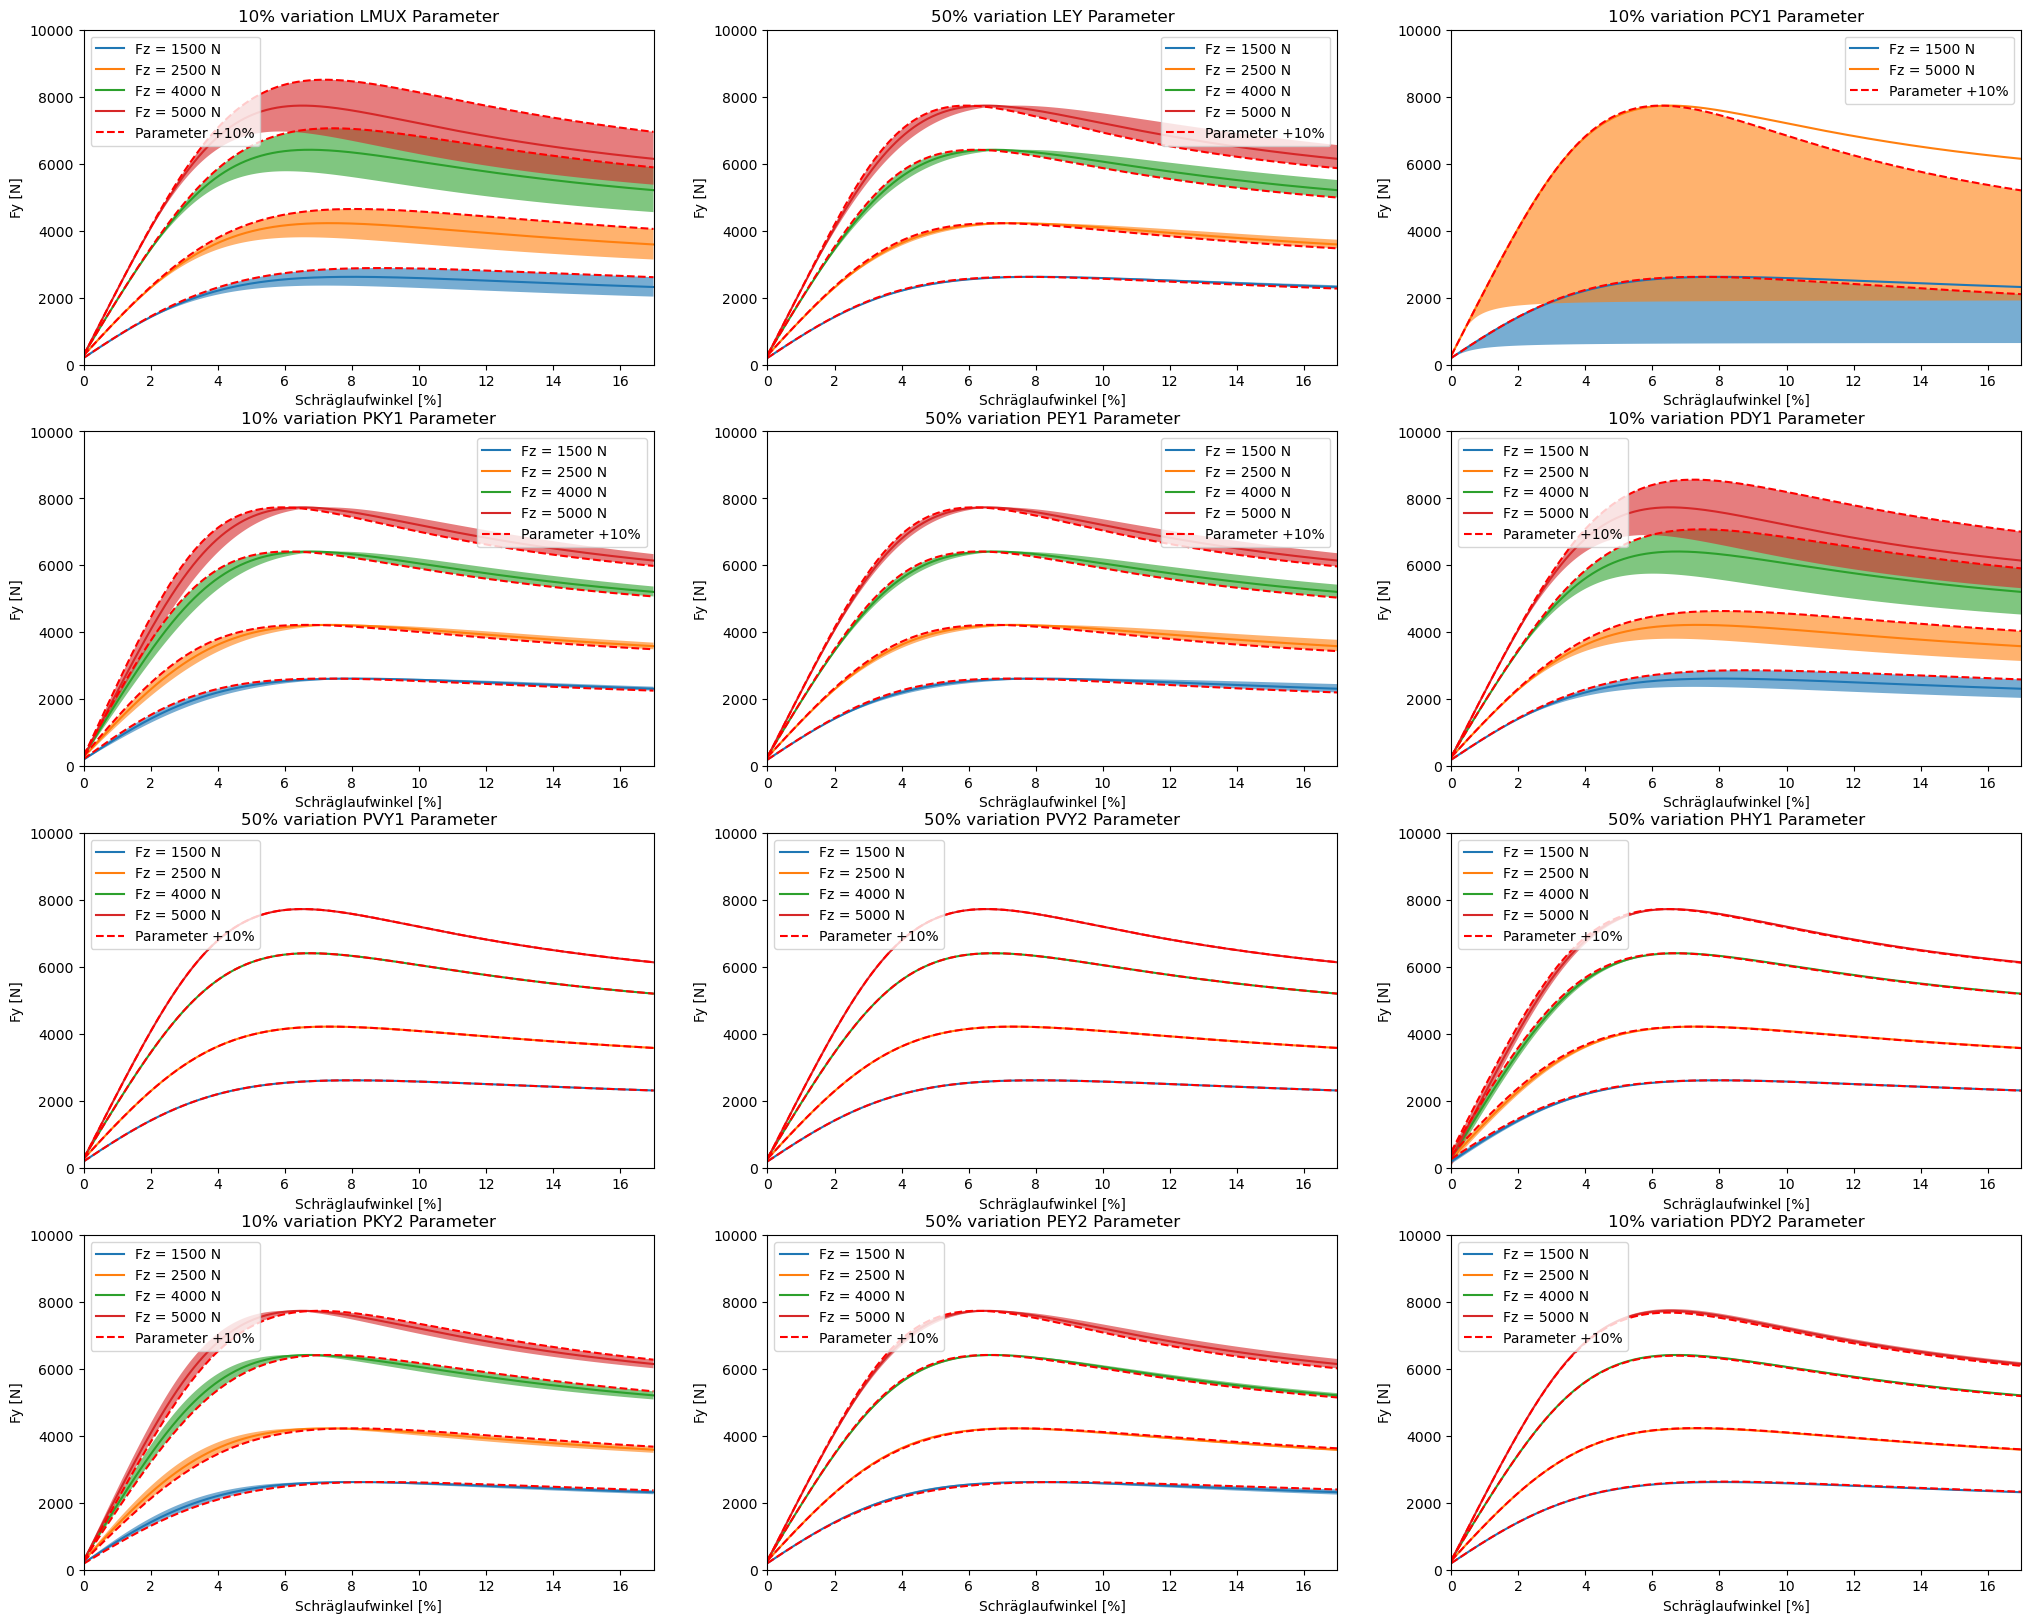

In [10]:
Fz = [1500, 2500, 4000, 5000]
Sy = np.linspace(0,0.3,1000)
Fz0 = 3114

fig, ax = plt.subplots(4,3, figsize = (25,20))

for j in range(len(Fz)):
    Fy = pa52gl.Pacejka52_lat(Sy,Fz[j],Fz0,pa.PVY1, pa.PVY2, pa.PVY3, pa.PVY4, pa.PKY1, pa.PKY2, pa.PKY3, pa.PKY4, pa.PKY5, pa.PKY6, pa.PKY7, pa.PHY1, pa.PHY2, pa.PCY1, pa.PDY1, pa.PDY2, pa.PDY3, pa.PEY1, pa.PEY2, pa.PEY3, pa.PEY4, pa.PEY5, pa.LMUY, pa.LEY)[0]
    ax[0,0].plot(Sy_plt,Fy,label = f"Fz = {Fz[j]} N")

for j in range(len(Fz)):    
    LMUX_pos =   pa.LMUX * 1.1
    Fy_pos = pa52gl.Pacejka52_lat(Sy,Fz[j],Fz0,pa.PVY1, pa.PVY2, pa.PVY3, pa.PVY4, pa.PKY1, pa.PKY2, pa.PKY3, pa.PKY4, pa.PKY5, pa.PKY6, pa.PKY7, pa.PHY1, pa.PHY2, pa.PCY1, pa.PDY1, pa.PDY2, pa.PDY3, pa.PEY1, pa.PEY2, pa.PEY3, pa.PEY4, pa.PEY5,LMUX_pos, pa.LEY)[0]
    ax[0, 0].plot(Sy_plt,Fy_pos, 'r--')

    LMUX_neg =   pa.LMUX * 0.9
    Fy_neg = pa52gl.Pacejka52_lat(Sy,Fz[j],Fz0,pa.PVY1, pa.PVY2, pa.PVY3, pa.PVY4, pa.PKY1, pa.PKY2, pa.PKY3, pa.PKY4, pa.PKY5, pa.PKY6, pa.PKY7, pa.PHY1, pa.PHY2, pa.PCY1, pa.PDY1, pa.PDY2, pa.PDY3, pa.PEY1, pa.PEY2, pa.PEY3, pa.PEY4, pa.PEY5, LMUX_neg, pa.LEY)[0]
    ax[0,0].fill_between(Sy_plt,Fy_pos,Fy_neg,  alpha = 0.6)

ax[0,0].set_title('10% variation LMUX Parameter')
ax[0,0].set_ylabel('Fy [N]')
ax[0,0].set_xlabel('Schräglaufwinkel [°]')
ax[0,0].set_xlim((0,17))
ax[0,0].set_ylim((0,10000))
ax[0,0].legend(labels = [f"Fz = {Fz[0]} N",f"Fz = {Fz[1]} N",f"Fz = {Fz[2]} N",f"Fz = {Fz[3]} N","Parameter +10%"])

for j in range(len(Fz)):
    Fy = pa52gl.Pacejka52_lat(Sy,Fz[j],Fz0,pa.PVY1, pa.PVY2, pa.PVY3, pa.PVY4, pa.PKY1, pa.PKY2, pa.PKY3, pa.PKY4, pa.PKY5, pa.PKY6, pa.PKY7, pa.PHY1, pa.PHY2, pa.PCY1, pa.PDY1, pa.PDY2, pa.PDY3, pa.PEY1, pa.PEY2, pa.PEY3, pa.PEY4, pa.PEY5, pa.LMUY, pa.LEY)[0]
    ax[0,1].plot(Sy_plt,Fy,label = f"Fz = {Fz[j]} N")

for j in range(len(Fz)):    
    LEY_pos =   pa.LEY * 1.5
    Fy_pos = pa52gl.Pacejka52_lat(Sy,Fz[j],Fz0,pa.PVY1, pa.PVY2, pa.PVY3, pa.PVY4, pa.PKY1, pa.PKY2, pa.PKY3, pa.PKY4, pa.PKY5, pa.PKY6, pa.PKY7, pa.PHY1, pa.PHY2, pa.PCY1, pa.PDY1, pa.PDY2, pa.PDY3, pa.PEY1, pa.PEY2, pa.PEY3, pa.PEY4, pa.PEY5, pa.LMUY,LEY_pos)[0]
    ax[0, 1].plot(Sy_plt,Fy_pos, 'r--')

    LEY_neg =   pa.LEY * 0.5
    Fy_neg = pa52gl.Pacejka52_lat(Sy,Fz[j],Fz0,pa.PVY1, pa.PVY2, pa.PVY3, pa.PVY4, pa.PKY1, pa.PKY2, pa.PKY3, pa.PKY4, pa.PKY5, pa.PKY6, pa.PKY7, pa.PHY1, pa.PHY2, pa.PCY1, pa.PDY1, pa.PDY2, pa.PDY3, pa.PEY1, pa.PEY2, pa.PEY3, pa.PEY4, pa.PEY5,  pa.LMUY, LEY_neg)[0]
    ax[0,1].fill_between(Sy_plt,Fy_pos,Fy_neg,  alpha = 0.6)

ax[0,1].set_title('50% variation LEY Parameter')
ax[0,1].set_ylabel('Fy [N]')
ax[0,1].set_xlabel('Schräglaufwinkel [°]')
ax[0,1].set_xlim((0,17))
ax[0,1].set_ylim((0,10000))
ax[0,1].legend(labels = [f"Fz = {Fz[0]} N",f"Fz = {Fz[1]} N",f"Fz = {Fz[2]} N",f"Fz = {Fz[3]} N","Parameter +10%"])

Fz1 = [1500, 5000]
for j in range(len(Fz1)):
    Fy = pa52gl.Pacejka52_lat(Sy,Fz1[j],Fz0,pa.PVY1, pa.PVY2, pa.PVY3, pa.PVY4, pa.PKY1, pa.PKY2, pa.PKY3, pa.PKY4, pa.PKY5, pa.PKY6, pa.PKY7, pa.PHY1, pa.PHY2, pa.PCY1, pa.PDY1, pa.PDY2, pa.PDY3, pa.PEY1, pa.PEY2, pa.PEY3, pa.PEY4, pa.PEY5, pa.LMUY, pa.LEY)[0]
    ax[0,2].plot(Sy_plt,Fy,label = f"Fz = {Fz1[j]} N")

for j in range(len(Fz1)):    
    PCY1_pos =   pa.PCY1 * 1.1
    Fy_pos = pa52gl.Pacejka52_lat(Sy,Fz1[j],Fz0,pa.PVY1, pa.PVY2, pa.PVY3, pa.PVY4, pa.PKY1, pa.PKY2, pa.PKY3, pa.PKY4, pa.PKY5, pa.PKY6, pa.PKY7, pa.PHY1, pa.PHY2,PCY1_pos, pa.PDY1, pa.PDY2, pa.PDY3, pa.PEY1, pa.PEY2, pa.PEY3, pa.PEY4, pa.PEY5, pa.LMUY, pa.LEY)[0]
    ax[0, 2].plot(Sy_plt,Fy_pos, 'r--')

    PCY1_neg =    pa.PCY1 * 0.1
    Fy_neg = pa52gl.Pacejka52_lat(Sy,Fz1[j],Fz0,pa.PVY1, pa.PVY2, pa.PVY3, pa.PVY4, pa.PKY1, pa.PKY2, pa.PKY3, pa.PKY4, pa.PKY5, pa.PKY6, pa.PKY7, pa.PHY1, pa.PHY2, PCY1_neg, pa.PDY1, pa.PDY2, pa.PDY3, pa.PEY1, pa.PEY2, pa.PEY3, pa.PEY4, pa.PEY5,  pa.LMUY, pa.LEY)[0]
    ax[0,2].fill_between(Sy_plt,Fy_pos,Fy_neg,  alpha = 0.6)

ax[0,2].set_title('10% variation PCY1 Parameter')
ax[0,2].set_ylabel('Fy [N]')
ax[0,2].set_xlabel('Schräglaufwinkel [°]')
ax[0,2].set_xlim((0,17))
ax[0,2].set_ylim((0,10000))
ax[0,2].legend(labels = [f"Fz = {Fz1[0]} N",f"Fz = {Fz1[1]} N","Parameter +10%"])



for j in range(len(Fz)):
    Fy = pa52gl.Pacejka52_lat(Sy,Fz[j],Fz0,pa.PVY1, pa.PVY2, pa.PVY3, pa.PVY4, pa.PKY1, pa.PKY2, pa.PKY3, pa.PKY4, pa.PKY5, pa.PKY6, pa.PKY7, pa.PHY1, pa.PHY2, pa.PCY1, pa.PDY1, pa.PDY2, pa.PDY3, pa.PEY1, pa.PEY2, pa.PEY3, pa.PEY4, pa.PEY5, pa.LMUY, pa.LEY)[0]
    ax[1,0].plot(Sy_plt,Fy,label = f"Fz = {Fz[j]} N")

for j in range(len(Fz)):    
    PKY1_pos =   pa.PKY1 * 1.1
    Fy_pos = pa52gl.Pacejka52_lat(Sy,Fz[j],Fz0,pa.PVY1, pa.PVY2, pa.PVY3, pa.PVY4, PKY1_pos, pa.PKY2, pa.PKY3, pa.PKY4, pa.PKY5, pa.PKY6, pa.PKY7, pa.PHY1, pa.PHY2,pa.PCY1, pa.PDY1, pa.PDY2, pa.PDY3, pa.PEY1, pa.PEY2, pa.PEY3, pa.PEY4, pa.PEY5, pa.LMUY, pa.LEY)[0]
    ax[1, 0].plot(Sy_plt,Fy_pos, 'r--')

    PKY1_neg =    pa.PKY1 * 0.9
    Fy_neg = pa52gl.Pacejka52_lat(Sy,Fz[j],Fz0,pa.PVY1, pa.PVY2, pa.PVY3, pa.PVY4, PKY1_neg, pa.PKY2, pa.PKY3, pa.PKY4, pa.PKY5, pa.PKY6, pa.PKY7, pa.PHY1, pa.PHY2, pa.PCY1, pa.PDY1, pa.PDY2, pa.PDY3, pa.PEY1, pa.PEY2, pa.PEY3, pa.PEY4, pa.PEY5,  pa.LMUY, pa.LEY)[0]
    ax[1,0].fill_between(Sy_plt,Fy_pos,Fy_neg,  alpha = 0.6)

ax[1,0].set_title('10% variation PKY1 Parameter')
ax[1,0].set_ylabel('Fy [N]')
ax[1,0].set_xlabel('Schräglaufwinkel [°]')
ax[1,0].set_xlim((0,17))
ax[1,0].set_ylim((0,10000))
ax[1,0].legend(labels = [f"Fz = {Fz[0]} N",f"Fz = {Fz[1]} N",f"Fz = {Fz[2]} N",f"Fz = {Fz[3]} N","Parameter +10%"])


for j in range(len(Fz)):
    Fy = pa52gl.Pacejka52_lat(Sy,Fz[j],Fz0,pa.PVY1, pa.PVY2, pa.PVY3, pa.PVY4, pa.PKY1, pa.PKY2, pa.PKY3, pa.PKY4, pa.PKY5, pa.PKY6, pa.PKY7, pa.PHY1, pa.PHY2, pa.PCY1, pa.PDY1, pa.PDY2, pa.PDY3, pa.PEY1, pa.PEY2, pa.PEY3, pa.PEY4, pa.PEY5, pa.LMUY, pa.LEY)[0]
    ax[1,1].plot(Sy_plt,Fy,label = f"Fz = {Fz[j]} N")

for j in range(len(Fz)):    
    PEY1_pos =   pa.PEY1 * 1.5
    Fy_pos = pa52gl.Pacejka52_lat(Sy,Fz[j],Fz0,pa.PVY1, pa.PVY2, pa.PVY3, pa.PVY4,  pa.PKY1, pa.PKY2, pa.PKY3, pa.PKY4, pa.PKY5, pa.PKY6, pa.PKY7, pa.PHY1, pa.PHY2,pa.PCY1, pa.PDY1, pa.PDY2, pa.PDY3, PEY1_pos, pa.PEY2, pa.PEY3, pa.PEY4, pa.PEY5, pa.LMUY, pa.LEY)[0]
    ax[1, 1].plot(Sy_plt,Fy_pos, 'r--')

    PEY1_neg =    pa.PEY1 * 0.5
    Fy_neg = pa52gl.Pacejka52_lat(Sy,Fz[j],Fz0,pa.PVY1, pa.PVY2, pa.PVY3, pa.PVY4,  pa.PKY1, pa.PKY2, pa.PKY3, pa.PKY4, pa.PKY5, pa.PKY6, pa.PKY7, pa.PHY1, pa.PHY2, pa.PCY1, pa.PDY1, pa.PDY2, pa.PDY3, PEY1_neg, pa.PEY2, pa.PEY3, pa.PEY4, pa.PEY5,  pa.LMUY, pa.LEY)[0]
    ax[1,1].fill_between(Sy_plt,Fy_pos,Fy_neg,  alpha = 0.6)

ax[1,1].set_title('50% variation PEY1 Parameter')
ax[1,1].set_ylabel('Fy [N]')
ax[1,1].set_xlabel('Schräglaufwinkel [°]')
ax[1,1].set_xlim((0,17))
ax[1,1].set_ylim((0,10000))
ax[1,1].legend(labels = [f"Fz = {Fz[0]} N",f"Fz = {Fz[1]} N",f"Fz = {Fz[2]} N",f"Fz = {Fz[3]} N","Parameter +10%"])


for j in range(len(Fz)):
    Fy = pa52gl.Pacejka52_lat(Sy,Fz[j],Fz0,pa.PVY1, pa.PVY2, pa.PVY3, pa.PVY4, pa.PKY1, pa.PKY2, pa.PKY3, pa.PKY4, pa.PKY5, pa.PKY6, pa.PKY7, pa.PHY1, pa.PHY2, pa.PCY1, pa.PDY1, pa.PDY2, pa.PDY3, pa.PEY1, pa.PEY2, pa.PEY3, pa.PEY4, pa.PEY5, pa.LMUY, pa.LEY)[0]
    ax[1,2].plot(Sy_plt,Fy,label = f"Fz = {Fz[j]} N")

for j in range(len(Fz)):    
    PDY1_pos =   pa.PDY1 * 1.1
    Fy_pos = pa52gl.Pacejka52_lat(Sy,Fz[j],Fz0,pa.PVY1, pa.PVY2, pa.PVY3, pa.PVY4,  pa.PKY1, pa.PKY2, pa.PKY3, pa.PKY4, pa.PKY5, pa.PKY6, pa.PKY7, pa.PHY1, pa.PHY2,pa.PCY1, PDY1_pos, pa.PDY2, pa.PDY3, pa.PEY1, pa.PEY2, pa.PEY3, pa.PEY4, pa.PEY5, pa.LMUY, pa.LEY)[0]
    ax[1, 2].plot(Sy_plt,Fy_pos, 'r--')

    PDY1_neg =    pa.PDY1 * 0.9
    Fy_neg = pa52gl.Pacejka52_lat(Sy,Fz[j],Fz0,pa.PVY1, pa.PVY2, pa.PVY3, pa.PVY4,  pa.PKY1, pa.PKY2, pa.PKY3, pa.PKY4, pa.PKY5, pa.PKY6, pa.PKY7, pa.PHY1, pa.PHY2, pa.PCY1, PDY1_neg, pa.PDY2, pa.PDY3, pa.PEY1, pa.PEY2, pa.PEY3, pa.PEY4, pa.PEY5,  pa.LMUY, pa.LEY)[0]
    ax[1,2].fill_between(Sy_plt,Fy_pos,Fy_neg,  alpha = 0.6)

ax[1,2].set_title('10% variation PDY1 Parameter')
ax[1,2].set_ylabel('Fy [N]')
ax[1,2].set_xlabel('Schräglaufwinkel [°]')
ax[1,2].set_xlim((0,17))
ax[1,2].set_ylim((0,10000))
ax[1,2].legend(labels = [f"Fz = {Fz[0]} N",f"Fz = {Fz[1]} N",f"Fz = {Fz[2]} N",f"Fz = {Fz[3]} N","Parameter +10%"])

for j in range(len(Fz)):
    Fy = pa52gl.Pacejka52_lat(Sy,Fz[j],Fz0,pa.PVY1, pa.PVY2, pa.PVY3, pa.PVY4, pa.PKY1, pa.PKY2, pa.PKY3, pa.PKY4, pa.PKY5, pa.PKY6, pa.PKY7, pa.PHY1, pa.PHY2, pa.PCY1, pa.PDY1, pa.PDY2, pa.PDY3, pa.PEY1, pa.PEY2, pa.PEY3, pa.PEY4, pa.PEY5, pa.LMUY, pa.LEY)[0]
    ax[2,0].plot(Sy_plt,Fy,label = f"Fz = {Fz[j]} N")

for j in range(len(Fz)):    
    PVY1_pos =   pa.PVY1 * 1.5
    Fy_pos = pa52gl.Pacejka52_lat(Sy,Fz[j],Fz0,PVY1_pos, pa.PVY2, pa.PVY3, pa.PVY4,  pa.PKY1, pa.PKY2, pa.PKY3, pa.PKY4, pa.PKY5, pa.PKY6, pa.PKY7, pa.PHY1, pa.PHY2,pa.PCY1, pa.PDY1, pa.PDY2, pa.PDY3, pa.PEY1, pa.PEY2, pa.PEY3, pa.PEY4, pa.PEY5, pa.LMUY, pa.LEY)[0]
    ax[2, 0].plot(Sy_plt,Fy_pos, 'r--')

    PVY1_neg =    pa.PVY1 * 0.5
    Fy_neg = pa52gl.Pacejka52_lat(Sy,Fz[j],Fz0,PVY1_neg, pa.PVY2, pa.PVY3, pa.PVY4,  pa.PKY1, pa.PKY2, pa.PKY3, pa.PKY4, pa.PKY5, pa.PKY6, pa.PKY7, pa.PHY1, pa.PHY2, pa.PCY1, pa.PDY1, pa.PDY2, pa.PDY3, pa.PEY1, pa.PEY2, pa.PEY3, pa.PEY4, pa.PEY5,  pa.LMUY, pa.LEY)[0]
    ax[2,0].fill_between(Sy_plt,Fy_pos,Fy_neg,  alpha = 0.6)

ax[2,0].set_title('50% variation PVY1 Parameter')
ax[2,0].set_ylabel('Fy [N]')
ax[2,0].set_xlabel('Schräglaufwinkel [°]')
ax[2,0].set_xlim((0,17))
ax[2,0].set_ylim((0,10000))
ax[2,0].legend(labels = [f"Fz = {Fz[0]} N",f"Fz = {Fz[1]} N",f"Fz = {Fz[2]} N",f"Fz = {Fz[3]} N","Parameter +10%"])

for j in range(len(Fz)):
    Fy = pa52gl.Pacejka52_lat(Sy,Fz[j],Fz0,pa.PVY1, pa.PVY2, pa.PVY3, pa.PVY4, pa.PKY1, pa.PKY2, pa.PKY3, pa.PKY4, pa.PKY5, pa.PKY6, pa.PKY7, pa.PHY1, pa.PHY2, pa.PCY1, pa.PDY1, pa.PDY2, pa.PDY3, pa.PEY1, pa.PEY2, pa.PEY3, pa.PEY4, pa.PEY5, pa.LMUY, pa.LEY)[0]
    ax[2,1].plot(Sy_plt,Fy,label = f"Fz = {Fz[j]} N")

for j in range(len(Fz)):    
    PVY2_pos =   pa.PVY2 * 1.5
    Fy_pos = pa52gl.Pacejka52_lat(Sy,Fz[j],Fz0,pa.PVY1, PVY2_pos, pa.PVY3, pa.PVY4,  pa.PKY1, pa.PKY2, pa.PKY3, pa.PKY4, pa.PKY5, pa.PKY6, pa.PKY7, pa.PHY1, pa.PHY2,pa.PCY1, pa.PDY1, pa.PDY2, pa.PDY3, pa.PEY1, pa.PEY2, pa.PEY3, pa.PEY4, pa.PEY5, pa.LMUY, pa.LEY)[0]
    ax[2, 1].plot(Sy_plt,Fy_pos, 'r--')

    PVY2_neg =    pa.PVY2 * 0.5
    Fy_neg = pa52gl.Pacejka52_lat(Sy,Fz[j],Fz0,pa.PVY1, PVY2_neg, pa.PVY3, pa.PVY4,  pa.PKY1, pa.PKY2, pa.PKY3, pa.PKY4, pa.PKY5, pa.PKY6, pa.PKY7, pa.PHY1, pa.PHY2, pa.PCY1, pa.PDY1, pa.PDY2, pa.PDY3, pa.PEY1, pa.PEY2, pa.PEY3, pa.PEY4, pa.PEY5,  pa.LMUY, pa.LEY)[0]
    ax[2,1].fill_between(Sy_plt,Fy_pos,Fy_neg,  alpha = 0.6)

ax[2,1].set_title('50% variation PVY2 Parameter')
ax[2,1].set_ylabel('Fy [N]')
ax[2,1].set_xlabel('Schräglaufwinkel [°]')
ax[2,1].set_xlim((0,17))
ax[2,1].set_ylim((0,10000))
ax[2,1].legend(labels = [f"Fz = {Fz[0]} N",f"Fz = {Fz[1]} N",f"Fz = {Fz[2]} N",f"Fz = {Fz[3]} N","Parameter +10%"])

for j in range(len(Fz)):
    Fy = pa52gl.Pacejka52_lat(Sy,Fz[j],Fz0,pa.PVY1, pa.PVY2, pa.PVY3, pa.PVY4, pa.PKY1, pa.PKY2, pa.PKY3, pa.PKY4, pa.PKY5, pa.PKY6, pa.PKY7, pa.PHY1, pa.PHY2, pa.PCY1, pa.PDY1, pa.PDY2, pa.PDY3, pa.PEY1, pa.PEY2, pa.PEY3, pa.PEY4, pa.PEY5, pa.LMUY, pa.LEY)[0]
    ax[2,2].plot(Sy_plt,Fy,label = f"Fz = {Fz[j]} N")

for j in range(len(Fz)):    
    PHY1_pos =   pa.PHY1 * 1.5
    Fy_pos = pa52gl.Pacejka52_lat(Sy,Fz[j],Fz0,pa.PVY1, pa.PVY2, pa.PVY3, pa.PVY4,  pa.PKY1, pa.PKY2, pa.PKY3, pa.PKY4, pa.PKY5, pa.PKY6, pa.PKY7, PHY1_pos, pa.PHY2,pa.PCY1, pa.PDY1, pa.PDY2, pa.PDY3, pa.PEY1, pa.PEY2, pa.PEY3, pa.PEY4, pa.PEY5, pa.LMUY, pa.LEY)[0]
    ax[2, 2].plot(Sy_plt,Fy_pos, 'r--')

    PHY1_neg =    pa.PHY1 * 0.5
    Fy_neg = pa52gl.Pacejka52_lat(Sy,Fz[j],Fz0,pa.PVY1, pa.PVY2, pa.PVY3, pa.PVY4,  pa.PKY1, pa.PKY2, pa.PKY3, pa.PKY4, pa.PKY5, pa.PKY6, pa.PKY7, PHY1_neg, pa.PHY2, pa.PCY1, pa.PDY1, pa.PDY2, pa.PDY3, pa.PEY1, pa.PEY2, pa.PEY3, pa.PEY4, pa.PEY5,  pa.LMUY, pa.LEY)[0]
    ax[2,2].fill_between(Sy_plt,Fy_pos,Fy_neg,  alpha = 0.6)

ax[2,2].set_title('50% variation PHY1 Parameter')
ax[2,2].set_ylabel('Fy [N]')
ax[2,2].set_xlabel('Schräglaufwinkel [°]')
ax[2,2].set_xlim((0,17))
ax[2,2].set_ylim((0,10000))
ax[2,2].legend(labels = [f"Fz = {Fz[0]} N",f"Fz = {Fz[1]} N",f"Fz = {Fz[2]} N",f"Fz = {Fz[3]} N","Parameter +10%"])

for j in range(len(Fz)):
    Fy = pa52gl.Pacejka52_lat(Sy,Fz[j],Fz0,pa.PVY1, pa.PVY2, pa.PVY3, pa.PVY4, pa.PKY1, pa.PKY2, pa.PKY3, pa.PKY4, pa.PKY5, pa.PKY6, pa.PKY7, pa.PHY1, pa.PHY2, pa.PCY1, pa.PDY1, pa.PDY2, pa.PDY3, pa.PEY1, pa.PEY2, pa.PEY3, pa.PEY4, pa.PEY5, pa.LMUY, pa.LEY)[0]
    ax[3,0].plot(Sy_plt,Fy,label = f"Fz = {Fz[j]} N")

for j in range(len(Fz)):    
    PKY2_pos =   pa.PKY2 * 1.1
    Fy_pos = pa52gl.Pacejka52_lat(Sy,Fz[j],Fz0,pa.PVY1, pa.PVY2, pa.PVY3, pa.PVY4,  pa.PKY1, PKY2_pos, pa.PKY3, pa.PKY4, pa.PKY5, pa.PKY6, pa.PKY7, pa.PHY1, pa.PHY2,pa.PCY1, pa.PDY1, pa.PDY2, pa.PDY3, pa.PEY1, pa.PEY2, pa.PEY3, pa.PEY4, pa.PEY5, pa.LMUY, pa.LEY)[0]
    ax[3, 0].plot(Sy_plt,Fy_pos, 'r--')

    PKY2_neg =    pa.PKY2 * 0.9
    Fy_neg = pa52gl.Pacejka52_lat(Sy,Fz[j],Fz0,pa.PVY1, pa.PVY2, pa.PVY3, pa.PVY4,  pa.PKY1, PKY2_neg, pa.PKY3, pa.PKY4, pa.PKY5, pa.PKY6, pa.PKY7, pa.PHY1, pa.PHY2, pa.PCY1, pa.PDY1, pa.PDY2, pa.PDY3, pa.PEY1, pa.PEY2, pa.PEY3, pa.PEY4, pa.PEY5,  pa.LMUY, pa.LEY)[0]
    ax[3,0].fill_between(Sy_plt,Fy_pos,Fy_neg,  alpha = 0.6)

ax[3,0].set_title('10% variation PKY2 Parameter')
ax[3,0].set_ylabel('Fy [N]')
ax[3,0].set_xlabel('Schräglaufwinkel [°]')
ax[3,0].set_xlim((0,17))
ax[3,0].set_ylim((0,10000))
ax[3,0].legend(labels = [f"Fz = {Fz[0]} N",f"Fz = {Fz[1]} N",f"Fz = {Fz[2]} N",f"Fz = {Fz[3]} N","Parameter +10%"])

for j in range(len(Fz)):
    Fy = pa52gl.Pacejka52_lat(Sy,Fz[j],Fz0,pa.PVY1, pa.PVY2, pa.PVY3, pa.PVY4, pa.PKY1, pa.PKY2, pa.PKY3, pa.PKY4, pa.PKY5, pa.PKY6, pa.PKY7, pa.PHY1, pa.PHY2, pa.PCY1, pa.PDY1, pa.PDY2, pa.PDY3, pa.PEY1, pa.PEY2, pa.PEY3, pa.PEY4, pa.PEY5, pa.LMUY, pa.LEY)[0]
    ax[3,1].plot(Sy_plt,Fy,label = f"Fz = {Fz[j]} N")

for j in range(len(Fz)):    
    PEY2_pos =   pa.PEY2 * 1.5
    Fy_pos = pa52gl.Pacejka52_lat(Sy,Fz[j],Fz0,pa.PVY1, pa.PVY2, pa.PVY3, pa.PVY4,  pa.PKY1, pa.PKY2, pa.PKY3, pa.PKY4, pa.PKY5, pa.PKY6, pa.PKY7, pa.PHY1, pa.PHY2,pa.PCY1, pa.PDY1, pa.PDY2, pa.PDY3, pa.PEY1,PEY2_pos, pa.PEY3, pa.PEY4, pa.PEY5, pa.LMUY, pa.LEY)[0]
    ax[3, 1].plot(Sy_plt,Fy_pos, 'r--')

    PEY2_neg =    pa.PEY2 * 0.5
    Fy_neg = pa52gl.Pacejka52_lat(Sy,Fz[j],Fz0,pa.PVY1, pa.PVY2, pa.PVY3, pa.PVY4,  pa.PKY1, pa.PKY2, pa.PKY3, pa.PKY4, pa.PKY5, pa.PKY6, pa.PKY7, pa.PHY1, pa.PHY2, pa.PCY1, pa.PDY1, pa.PDY2, pa.PDY3, pa.PEY1, PEY2_neg, pa.PEY3, pa.PEY4, pa.PEY5,  pa.LMUY, pa.LEY)[0]
    ax[3,1].fill_between(Sy_plt,Fy_pos,Fy_neg,  alpha = 0.6)

ax[3,1].set_title('50% variation PEY2 Parameter')
ax[3,1].set_ylabel('Fy [N]')
ax[3,1].set_xlabel('Schräglaufwinkel [°]')
ax[3,1].set_xlim((0,17))
ax[3,1].set_ylim((0,10000))
ax[3,1].legend(labels = [f"Fz = {Fz[0]} N",f"Fz = {Fz[1]} N",f"Fz = {Fz[2]} N",f"Fz = {Fz[3]} N","Parameter +10%"])

for j in range(len(Fz)):
    Fy = pa52gl.Pacejka52_lat(Sy,Fz[j],Fz0,pa.PVY1, pa.PVY2, pa.PVY3, pa.PVY4, pa.PKY1, pa.PKY2, pa.PKY3, pa.PKY4, pa.PKY5, pa.PKY6, pa.PKY7, pa.PHY1, pa.PHY2, pa.PCY1, pa.PDY1, pa.PDY2, pa.PDY3, pa.PEY1, pa.PEY2, pa.PEY3, pa.PEY4, pa.PEY5, pa.LMUY, pa.LEY)[0]
    ax[3,2].plot(Sy_plt,Fy,label = f"Fz = {Fz[j]} N")

for j in range(len(Fz)):    
    PDY2_pos =   pa.PDY2 * 1.1
    Fy_pos = pa52gl.Pacejka52_lat(Sy,Fz[j],Fz0,pa.PVY1, pa.PVY2, pa.PVY3, pa.PVY4,  pa.PKY1, pa.PKY2, pa.PKY3, pa.PKY4, pa.PKY5, pa.PKY6, pa.PKY7, pa.PHY1, pa.PHY2,pa.PCY1, pa.PDY1, PDY2_pos, pa.PDY3, pa.PEY1,pa.PEY2, pa.PEY3, pa.PEY4, pa.PEY5, pa.LMUY, pa.LEY)[0]
    ax[3, 2].plot(Sy_plt,Fy_pos, 'r--')

    PDY2_neg =    pa.PDY2 * 0.9
    Fy_neg = pa52gl.Pacejka52_lat(Sy,Fz[j],Fz0,pa.PVY1, pa.PVY2, pa.PVY3, pa.PVY4,  pa.PKY1, pa.PKY2, pa.PKY3, pa.PKY4, pa.PKY5, pa.PKY6, pa.PKY7, pa.PHY1, pa.PHY2, pa.PCY1, pa.PDY1,PDY2_neg, pa.PDY3, pa.PEY1, pa.PEY2, pa.PEY3, pa.PEY4, pa.PEY5,  pa.LMUY, pa.LEY)[0]
    ax[3,2].fill_between(Sy_plt,Fy_pos,Fy_neg,  alpha = 0.6)

ax[3,2].set_title('10% variation PDY2 Parameter')
ax[3,2].set_ylabel('Fy [N]')
ax[3,2].set_xlabel('Schräglaufwinkel [°]')
ax[3,2].set_xlim((0,17))
ax[3,2].set_ylim((0,10000))
ax[3,2].legend(labels = [f"Fz = {Fz[0]} N",f"Fz = {Fz[1]} N",f"Fz = {Fz[2]} N",f"Fz = {Fz[3]} N","Parameter +10%"])

6414.260247765218
6434.55224670858


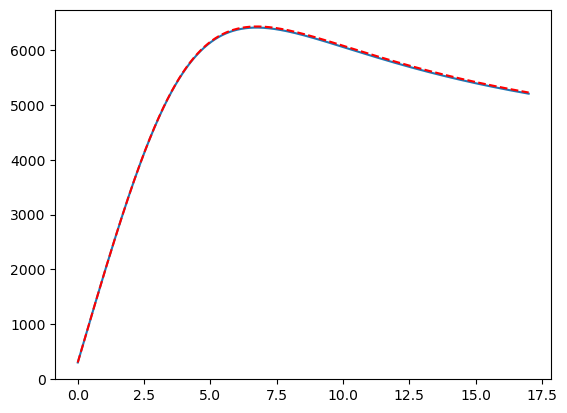

In [11]:
##C parameter vergleich


Fz = 4000
  

Fy = pa52gl.Pacejka52_lat(Sy,Fz,Fz0,pa.PVY1, pa.PVY2, pa.PVY3, pa.PVY4, pa.PKY1, pa.PKY2, pa.PKY3, pa.PKY4, pa.PKY5, pa.PKY6, pa.PKY7, pa.PHY1, pa.PHY2,pa.PCY1, pa.PDY1, pa.PDY2, pa.PDY3, pa.PEY1, pa.PEY2, pa.PEY3, pa.PEY4, pa.PEY5, pa.LMUY, pa.LEY)[0]

PDY2_neg =    pa.PDY2 * 0.9
Fy_neg = pa52gl.Pacejka52_lat(Sy,Fz,Fz0,pa.PVY1, pa.PVY2, pa.PVY3, pa.PVY4, pa.PKY1, pa.PKY2, pa.PKY3, pa.PKY4, pa.PKY5, pa.PKY6, pa.PKY7, pa.PHY1, pa.PHY2, pa.PCY1, pa.PDY1, PDY2_neg, pa.PDY3, pa.PEY1, pa.PEY2, pa.PEY3, pa.PEY4, pa.PEY5,  pa.LMUY, pa.LEY)[0]

print(np.max(Fy))
print(np.max(Fy_neg))
plt.plot(Sy_plt,Fy)
plt.plot(Sy_plt,Fy_neg, 'r--')

